## Trauma Data

In [1]:
import pandas as pd

trauma_data = pd.read_json('trauma_data.json', orient='records')
print(trauma_data.shape)
print(trauma_data.head())

(486, 3)
                                             address  \
0  13677 W. McDowell Rd., Suite 201, Goodyear, AZ...   
1           875 8th St. NE, Massillon, OH 44646-3554   
2                One Perkins Square, Akron, OH 44308   
3            4315 Diplomacy Dr., Anchorage, AK 99508   
4  43 New Scotland Ave., Mail Code 194, Albany, N...   

                       hospital                              level  
0            Abrazo West Campus             Level II Trauma Center  
1       Affinity Medical Center            Level III Trauma Center  
2     Akron Children's Hospital   Level II Pediatric Trauma Center  
3  Alaska Native Medical Center             Level II Trauma Center  
4         Albany Medical Center              Level I Trauma Center  


In [2]:
trauma_data

,address,hospital,level
0,"13677 W. McDowell Rd., Suite 201, Goodyear, AZ...",Abrazo West Campus,Level II Trauma Center
1,"875 8th St. NE, Massillon, OH 44646-3554",Affinity Medical Center,Level III Trauma Center
2,"One Perkins Square, Akron, OH 44308",Akron Children's Hospital,Level II Pediatric Trauma Center
3,"4315 Diplomacy Dr., Anchorage, AK 99508",Alaska Native Medical Center,Level II Trauma Center
4,"43 New Scotland Ave., Mail Code 194, Albany, N...",Albany Medical Center,Level I Trauma Center
5,"1200 S. Columbia Rd., Grand Forks, ND 58201",Altru Health System,Level II Trauma Center
6,"25 Highland Avenue, Newburyport, MA 01950",Anna Jaques Hospital,Level III Trauma Center
7,"1600 West Avenue J, Lancaster, CA 93534",Antelope Valley Hospital,Level II Trauma Center
8,"One Children's Way, Slot 837, Little Rock, AR ...",Arkansas Children's Hospital,Level I Pediatric Trauma Center
9,"400 N. Pepper Ave., Colton, CA 92324",Arrowhead Regional Medical Center,Level II Trauma Center


In [3]:
zip_list = []
state_list = []
city_list = []
for each in trauma_data.address:
    zip_code = each.split(" ")[-1]
    zip_list.append(zip_code.split("-")[0])
    state_list.append(each.split(" ")[-2])
    city_list.append(each.split(",")[-2])

In [4]:
#trauma_data['zip_code'] = zip_list
trauma_data['state'] = state_list
trauma_data['city'] = city_list

In [5]:
trauma_data = trauma_data.drop('address',axis=1)

In [6]:
adult_list = []
for each in trauma_data.level:
    if 'Pediatric' in each:
        if len(each.split(',')) > 1:
               adult_list.append(each.split(",")[0])
        else:
            adult_list.append(None)
    else:
        adult_list.append(each)

In [7]:
for i in range(len(adult_list)):
    if adult_list[i] != None:
        if "Trauma" in adult_list[i]:
            adult_list[i] = adult_list[i].split('Trauma')[0]
        else:
            adult_list[i] = adult_list[i].split('Adult')[0]

In [8]:
trauma_data['adult_trauma'] = adult_list

In [9]:
ped_list = []
for each in trauma_data.level:
    if 'Pediatric' in each.split(",")[-1]:
        ped_list.append(each.split(",")[-1])
    else:
        ped_list.append(None)

In [10]:
for i in range(len(ped_list)):
    if ped_list[i] != None:
        ped_list[i] = ped_list[i].split('Pediatric')[0]

In [11]:
trauma_data['pediatric_trauma'] = ped_list

In [12]:
trauma_data = trauma_data.drop('level',axis=1)

In [13]:
trauma_data = trauma_data.sort_values(by=['state','city'])

In [14]:
trauma_data.index = range(len(trauma_data.index))

In [15]:
trauma_data['hospital'] = trauma_data.hospital.str.title()

In [16]:
trauma_data['hospital'] = trauma_data.hospital.str.strip()
trauma_data['city'] = trauma_data.city.str.strip()
trauma_data['state'] = trauma_data.state.str.strip()

In [17]:
trauma_data

,hospital,state,city,adult_trauma,pediatric_trauma
0,Alaska Native Medical Center,AK,Anchorage,Level II,None
1,Providence Alaska Medical Center,AK,Anchorage,Level II,Level II
2,University Of Alabama At Birmingham Hospital,AL,Birmingham,Level I,None
3,Arkansas Children'S Hospital,AR,Little Rock,None,Level I
4,University Of Arkansas For Medical Sciences,AR,Little Rock,Level I,None
5,Dignity Health Chandler Regional Medical Center,AZ,Chandler,Level I,None
6,Abrazo West Campus,AZ,Goodyear,Level II,None
7,Havasu Regional Medical Center,AZ,Lake Havasu City,Level III,None
8,Banner Baywood Medical Center,AZ,Mesa,Level III,None
9,Mountain Vista Medical Center,AZ,Mesa,Level III,None


## Fall Data

In [18]:
import pandas as pd

fall_data = pd.read_json('hospital_data.json', orient='records')
print(fall_data.shape)
print(fall_data.head())

(2261, 3)
                                           hospital hospital_falls state_falls
0                BECKLEY ARH HOSPITAL - BECKLEY, WV         2.096%      0.833%
1  CAMPBELL COUNTY MEMORIAL HOSPITAL - GILLETTE, WY         0.727%      1.114%
2      ALASKA NATIVE MEDICAL CENTER - ANCHORAGE, AK         1.312%      1.414%
3  ADVENTIST MEDICAL CENTER - REEDLEY - REEDLEY, CA         1.522%      0.625%
4              BRIDGEPORT HOSPITAL - BRIDGEPORT, CT         0.622%      0.552%


In [19]:
fall_list = []
state_fall = []
for each in fall_data.hospital_falls:
    fall_list.append(each.split("%")[0])
for each in fall_data.state_falls:
    state_fall.append(each.split("%")[0])

In [20]:
fall_data['hospital_falls'] = fall_list
fall_data['state_falls'] = state_fall

In [21]:
states_data = []
for each in fall_data.hospital:
    states_data.append(each.split(",")[-1])

In [22]:
city_data = []
cities = []
hospitals = []
for each in fall_data.hospital:
    hospitals.append(each.split("-")[:-1])
    city_data.append(each.split("-")[-1])
for each in city_data:
    cities.append(each.split(",")[0])

In [23]:
fall_data['state'] = states_data
fall_data['city'] = cities
fall_data['hospital'] = hospitals

In [24]:
hospital_list = []
for each in fall_data.hospital:
    hospital_list.append("".join(each))

In [25]:
each_hospital = []
for each in hospital_list:
    item = each.split("  ")
    each_hospital.append(" ".join(item))

In [26]:
fall_data['hospital'] = each_hospital

In [27]:
fall_data = fall_data.sort_values(by=['state','city'])

In [28]:
fall_data['hospital'] = fall_data.hospital.str.title()
fall_data['city'] = fall_data.city.str.title()

In [29]:
fall_data.index = range(len(fall_data.index))

In [30]:
fall_data['hospital'] = fall_data.hospital.str.strip()
fall_data['city'] = fall_data.city.str.strip()
fall_data['state'] = fall_data.state.str.strip()

In [31]:
fall_data

,hospital,hospital_falls,state_falls,state,city
0,Alaska Native Medical Center,1.312,1.414,AK,Anchorage
1,Yukon Kuskokwim Delta Reg Hospital,1.742,1.414,AK,Bethel
2,Fairbanks Memorial Hospital,0.790,1.414,AK,Fairbanks
3,Mt Edgecumbe Hospital,1.812,1.414,AK,Sitka
4,Shelby Baptist Medical Center,0.141,0.715,AL,Alabaster
5,Russell Hospital,0.621,0.715,AL,Alexander City
6,Stringfellow Memorial Hospital,0.613,0.715,AL,Anniston
7,Athenslimestone Hospital,0.872,0.715,AL,Athens
8,"Medical West, An Affiliate Of Uab Health System",0.983,0.715,AL,Bessemer
9,University Of Alabama Hospital,0.329,0.715,AL,Birmingham


## Merging the Fall and Trauma Data

In [32]:
merged_fall = pd.merge(trauma_data, fall_data, on="hospital")

In [33]:
for i in range(len(merged_fall)):
    if merged_fall.state_x[i] != merged_fall.state_y[i]:
        merged_fall.drop(i, inplace=True)

In [34]:
merged_fall = merged_fall.drop(['state_y', 'city_y'], axis=1)

In [35]:
merged_fall.columns = ['hospital', 'state', 'city', 'adult_trauma', 'pediatric_trauma', 'hospital_falls', 'state_falls']

In [36]:
merged_fall.shape

(152, 7)

This merged_fall dataset is my inital attempt to join the two datasets that I scraped from the Hospital-data.com and the trauma centers from the American College of Surgeons.

In [37]:
merged_fall

,hospital,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls
0,Alaska Native Medical Center,AK,Anchorage,Level II,None,1.312,1.414
1,Havasu Regional Medical Center,AZ,Lake Havasu City,Level III,None,1.931,0.801
2,Banner Baywood Medical Center,AZ,Mesa,Level III,None,0.695,0.801
3,Mercy San Juan Medical Center,CA,Carmichael,Level II,None,0.340,0.625
4,Arrowhead Regional Medical Center,CA,Colton,Level II,None,1.100,0.625
5,Palomar Medical Center,CA,Escondido,Level II,None,0.560,0.625
6,Northbay Medical Center,CA,Fairfield,Level II,None,0.260,0.625
7,Community Regional Medical Center,CA,Fresno,Level I,None,0.180,0.625
8,Marin General Hospital,CA,Greenbrae,Level III,None,0.379,0.625
9,Long Beach Memorial Medical Center,CA,Long Beach,Level II,None,0.600,0.625


In [38]:
merged = pd.merge(trauma_data, fall_data, on="hospital", how='outer')

In [39]:
merged.shape

(2590, 9)

This merged dataset includes all the hospitals that did not have a match in both of the fall and trauma datasets. As you can see, this dataset is much larger than the set with perfect matches. 

In [40]:
merged

,hospital,state_x,city_x,adult_trauma,pediatric_trauma,hospital_falls,state_falls,state_y,city_y
0,Alaska Native Medical Center,AK,Anchorage,Level II,None,1.312,1.414,AK,Anchorage
1,Providence Alaska Medical Center,AK,Anchorage,Level II,Level II,NaN,NaN,NaN,NaN
2,University Of Alabama At Birmingham Hospital,AL,Birmingham,Level I,None,NaN,NaN,NaN,NaN
3,Arkansas Children'S Hospital,AR,Little Rock,None,Level I,NaN,NaN,NaN,NaN
4,University Of Arkansas For Medical Sciences,AR,Little Rock,Level I,None,NaN,NaN,NaN,NaN
5,Dignity Health Chandler Regional Medical Center,AZ,Chandler,Level I,None,NaN,NaN,NaN,NaN
6,Abrazo West Campus,AZ,Goodyear,Level II,None,NaN,NaN,NaN,NaN
7,Havasu Regional Medical Center,AZ,Lake Havasu City,Level III,None,1.931,0.801,AZ,Lake Havasu City
8,Banner Baywood Medical Center,AZ,Mesa,Level III,None,0.695,0.801,AZ,Mesa
9,Mountain Vista Medical Center,AZ,Mesa,Level III,None,NaN,NaN,NaN,NaN


In [41]:
unmatched_fall = merged[merged['city_x'].isnull()]
unmatched_fall.index = range(len(unmatched_fall.index))

Now, I have separated out the hospitals that are from the fall dataset with no corresponding trauma information. 

In [42]:
unmatched_fall

,hospital,state_x,city_x,adult_trauma,pediatric_trauma,hospital_falls,state_falls,state_y,city_y
0,Yukon Kuskokwim Delta Reg Hospital,NaN,NaN,NaN,NaN,1.742,1.414,AK,Bethel
1,Fairbanks Memorial Hospital,NaN,NaN,NaN,NaN,0.790,1.414,AK,Fairbanks
2,Mt Edgecumbe Hospital,NaN,NaN,NaN,NaN,1.812,1.414,AK,Sitka
3,Shelby Baptist Medical Center,NaN,NaN,NaN,NaN,0.141,0.715,AL,Alabaster
4,Russell Hospital,NaN,NaN,NaN,NaN,0.621,0.715,AL,Alexander City
5,Stringfellow Memorial Hospital,NaN,NaN,NaN,NaN,0.613,0.715,AL,Anniston
6,Athenslimestone Hospital,NaN,NaN,NaN,NaN,0.872,0.715,AL,Athens
7,"Medical West, An Affiliate Of Uab Health System",NaN,NaN,NaN,NaN,0.983,0.715,AL,Bessemer
8,University Of Alabama Hospital,NaN,NaN,NaN,NaN,0.329,0.715,AL,Birmingham
9,Trinity Medical Center,NaN,NaN,NaN,NaN,1.342,0.715,AL,Birmingham


In [43]:
unmatched_trauma = merged[merged['hospital_falls'].isnull()]
unmatched_trauma.index = range(len(unmatched_trauma.index))

Likewise, here are the hospitals from the trauma dataset that don't match with any of the fall hospitals. 

In [44]:
unmatched_trauma

,hospital,state_x,city_x,adult_trauma,pediatric_trauma,hospital_falls,state_falls,state_y,city_y
0,Providence Alaska Medical Center,AK,Anchorage,Level II,Level II,NaN,NaN,NaN,NaN
1,University Of Alabama At Birmingham Hospital,AL,Birmingham,Level I,None,NaN,NaN,NaN,NaN
2,Arkansas Children'S Hospital,AR,Little Rock,None,Level I,NaN,NaN,NaN,NaN
3,University Of Arkansas For Medical Sciences,AR,Little Rock,Level I,None,NaN,NaN,NaN,NaN
4,Dignity Health Chandler Regional Medical Center,AZ,Chandler,Level I,None,NaN,NaN,NaN,NaN
5,Abrazo West Campus,AZ,Goodyear,Level II,None,NaN,NaN,NaN,NaN
6,Mountain Vista Medical Center,AZ,Mesa,Level III,None,NaN,NaN,NaN,NaN
7,Banner University Medical Center Phoenix,AZ,Phoenix,Level I,None,NaN,NaN,NaN,NaN
8,Dignity Health St. Joseph'S Hospital And Medic...,AZ,Phoenix,Level I,None,NaN,NaN,NaN,NaN
9,Honorhealth Deer Valley Medical Center,AZ,Phoenix,Level III,None,NaN,NaN,NaN,NaN


In [45]:
combined_df = pd.DataFrame()

In [46]:
hospital_list = []
state_list = []
city_list = []
hospital_falls = []
state_falls = []
adult_trauma = []
pediatric_trauma = []
words_list = ['Hospital', 'Medical', 'Center', 'Health', 'System', 'Hospitals']
for i in range(len(unmatched_fall)):
    for j in range(len(unmatched_trauma)):
        if unmatched_fall.state_y[i] == unmatched_trauma.state_x[j] and unmatched_fall.city_y[i] == unmatched_trauma.city_x[j]:
            list_one = unmatched_fall.hospital[i].split()
            list_two = unmatched_trauma.hospital[j].split()
            together = list(set(list_one) & set(list_two) - set(words_list))
            if len(together) >= 1:
                hospital_list.append(unmatched_fall.hospital[i])
                state_list.append(unmatched_fall.state_y[i])
                city_list.append(unmatched_fall.city_y[i])
                hospital_falls.append(unmatched_fall.hospital_falls[i])
                state_falls.append(unmatched_fall.state_falls[i])
                adult_trauma.append(unmatched_trauma.adult_trauma[j])
                pediatric_trauma.append(unmatched_trauma.pediatric_trauma[j])
                break

In [47]:
combined_df['hospital'] = hospital_list
combined_df['state'] = state_list
combined_df['city'] = city_list
combined_df['adult_trauma'] = adult_trauma
combined_df['pediatric_trauma'] = pediatric_trauma
combined_df['hospital_falls'] = hospital_falls
combined_df['state_falls'] = state_falls

In [48]:
combined_df.shape

(230, 7)

This combined_df is made up of the hospitals from the fall and trauma datasets that I believe to be the same hospital. 

In [49]:
combined_df

,hospital,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls
0,University Of Alabama Hospital,AL,Birmingham,Level I,None,0.329,0.715
1,Arkansas Heart Hospital,AR,Little Rock,None,Level I,0.101,0.772
2,Mercy Medical Center,OH,Canton,Level II,None,0.605,0.740
3,Chandler Regional Medical Center,AZ,Chandler,Level I,None,0.379,0.801
4,West Valley Hospital,AZ,Goodyear,Level II,None,0.506,0.801
5,"Mountain Vista Medical Center, Lp",AZ,Mesa,Level III,None,0.710,0.801
6,Phoenix Baptist Hospital,AZ,Phoenix,Level I,None,0.928,0.801
7,Paradise Valley Hospital,AZ,Phoenix,Level III,None,1.272,0.801
8,Maricopa Medical Center,AZ,Phoenix,Level I,Level II,0.809,0.801
9,John C Lincoln North Mountain Hospital,AZ,Phoenix,Level I,None,0.445,0.801


In [50]:
df_list = [merged_fall, combined_df]

In [51]:
new_df = pd.concat(df_list).reset_index(drop=True)

In [52]:
new_df = new_df.sort_values(by=['state','city'])
new_df.index = range(len(new_df.index))

In [53]:
new_df.shape

(382, 7)

This new_df is a concated datafrom with both the initally matched hospitals of the merged_fall dataframe and the combined_df which is made of the remaining hospitals that were found to be the same. 

In [54]:
new_df

,hospital,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls
0,Alaska Native Medical Center,AK,Anchorage,Level II,None,1.312,1.414
1,University Of Alabama Hospital,AL,Birmingham,Level I,None,0.329,0.715
2,Arkansas Heart Hospital,AR,Little Rock,None,Level I,0.101,0.772
3,Chandler Regional Medical Center,AZ,Chandler,Level I,None,0.379,0.801
4,West Valley Hospital,AZ,Goodyear,Level II,None,0.506,0.801
5,Havasu Regional Medical Center,AZ,Lake Havasu City,Level III,None,1.931,0.801
6,Banner Baywood Medical Center,AZ,Mesa,Level III,None,0.695,0.801
7,"Mountain Vista Medical Center, Lp",AZ,Mesa,Level III,None,0.710,0.801
8,Phoenix Baptist Hospital,AZ,Phoenix,Level I,None,0.928,0.801
9,Paradise Valley Hospital,AZ,Phoenix,Level III,None,1.272,0.801


## CMS Fall Rates

In [55]:
import pandas as pd

second_falls = pd.read_csv('Selected_Hospital_Level_HAC_Rates.csv')
print(second_falls.shape)
print(second_falls.head())

(39240, 5)
   Hospital ID Number           Measure Name  Rate per 1,000 discharges  \
0               10001         FOREIGN OBJECT                      0.062   
1               10001           AIR EMBOLISM                      0.000   
2               10001  BLOOD INCOMPATIBILITY                      0.000   
3               10001         PRESSURE ULCER                      0.062   
4               10001       FALLS AND TRAUMA                      0.812   

  START_QUARTER END_QUARTER  
0        3Q2010      2Q2012  
1        3Q2010      2Q2012  
2        3Q2010      2Q2012  
3        3Q2010      2Q2012  
4        3Q2010      2Q2012  


In [56]:
CMS_falls = second_falls[second_falls['Measure Name'] == 'FALLS AND TRAUMA']

In [57]:
CMS_falls.index = range(len(CMS_falls.index))

In [58]:
CMS_falls.shape

(4905, 5)

This CMS_falls dataset contains fall rate information on around 4900 hospitals in the US. 

In [59]:
CMS_falls

,Hospital ID Number,Measure Name,"Rate per 1,000 discharges",START_QUARTER,END_QUARTER
0,10001,FALLS AND TRAUMA,0.812,3Q2010,2Q2012
1,10005,FALLS AND TRAUMA,0.445,3Q2010,2Q2012
2,10006,FALLS AND TRAUMA,0.182,3Q2010,2Q2012
3,10007,FALLS AND TRAUMA,1.042,3Q2010,2Q2012
4,10008,FALLS AND TRAUMA,0.000,3Q2010,2Q2012
5,10011,FALLS AND TRAUMA,1.149,3Q2010,2Q2012
6,10012,FALLS AND TRAUMA,0.000,3Q2010,2Q2012
7,10016,FALLS AND TRAUMA,0.412,3Q2010,2Q2012
8,10018,FALLS AND TRAUMA,0.000,3Q2010,2Q2012
9,10019,FALLS AND TRAUMA,0.327,3Q2010,2Q2012


In [60]:
hospital_info = pd.read_csv('Hospital_General_Information.csv')
print(hospital_info.shape)
print(hospital_info.head())

(4806, 29)
   Provider ID                   Hospital Name                     Address  \
0        10005   MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
1        10012  DEKALB REGIONAL MEDICAL CENTER        200 MED CENTER DRIVE   
2        10032                WEDOWEE HOSPITAL       209 NORTH MAIN STREET   
3        10095            HALE COUNTY HOSPITAL            508 GREEN STREET   
4        10131        CRESTWOOD MEDICAL CENTER          ONE HOSPITAL DR SE   

         City State  ZIP Code County Name  Phone Number         Hospital Type  \
0        BOAZ    AL     35957    MARSHALL    2565938310  Acute Care Hospitals   
1  FORT PAYNE    AL     35968     DE KALB    2568453150  Acute Care Hospitals   
2     WEDOWEE    AL     36278    RANDOLPH    2563572111  Acute Care Hospitals   
3  GREENSBORO    AL     36744        HALE    3346243024  Acute Care Hospitals   
4  HUNTSVILLE    AL     35801     MADISON    2568823100  Acute Care Hospitals   

                            Hospi

In [61]:
hospital_info = hospital_info.sort_values(by=['Provider ID'])

In [62]:
hospital_info.index = range(len(hospital_info.index))

In [63]:
hospital_info

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"1108 ROSS CLARK CIRCLE\nDOTHAN, AL\n(31.214058..."
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"205 MARENGO STREET\nFLORENCE, AL\n(34.79366, -..."
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...,"702 N MAIN ST\nOPP, AL\n(31.291972, -86.255415)"
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,NaN,Not Available,There are too few measures or measure groups r...,Same as the national average,NaN,Above the national average,NaN,Not Available,Results are not available for this reporting p...,"101 HOSPITAL CIRCLE\nLUVERNE, AL\n(31.692595, ..."
5,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,JEFFERSON,2058383122,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"50 MEDICAL PARK EAST DRIVE\nBIRMINGHAM, AL\n(3..."
6,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Below the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
7,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,SHELBY,2056208100,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,"1000 FIRST STREET NORTH\nALABASTER, AL\n(33.25..."
8,10018,CALLAHAN EYE HOSPITAL,1720 UNIVERSITY BLVD,BIRMINGHAM,AL,35233,JEFFERSON,2053258100,Acute Care Hospitals,Voluntary non-profit - Private,...,Results are not available for this reporting p...,Not Available,There are too few measures or measure groups r...,Same as the national average,NaN,Same as the national average,NaN,Not Available,There are too few measures or measure groups r...,"1720 UNIVERSITY BLVD\nBIRMINGHAM, AL\n(33.5031..."
9,10019,HELEN KELLER MEMORIAL HOSPITAL,1300 SOUTH MONTGOMERY AVENUE,SHEFFIELD,AL,35660,COLBERT,2563864556,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Abov

In [64]:
hospital_info.columns

Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Hospital Type', 'Hospital Ownership',
       'Emergency Services', 'Meets criteria for meaningful use of EHRs',
       'Hospital overall rating', 'Hospital overall rating footnote',
       'Mortality national comparison',
       'Mortality national comparison footnote',
       'Safety of care national comparison',
       'Safety of care national comparison footnote',
       'Readmission national comparison',
       'Readmission national comparison footnote',
       'Patient experience national comparison',
       'Patient experience national comparison footnote',
       'Effectiveness of care national comparison',
       'Effectiveness of care national comparison footnote',
       'Timeliness of care national comparison',
       'Timeliness of care national comparison footnote',
       'Efficient use of medical imaging national comparison',
       'Efficient use of medi

In [65]:
hospital_info = hospital_info.drop(hospital_info.iloc[:, 5:], axis=1)

In [66]:
hospital_info = hospital_info.drop('Address', axis=1)

In [67]:
CMS_Data = pd.merge(CMS_falls, hospital_info, left_on="Hospital ID Number", right_on="Provider ID")

In [68]:
CMS_Data['City'] = CMS_Data.City.str.title()
CMS_Data['Hospital Name'] = CMS_Data['Hospital Name'].str.title()

In [69]:
CMS_Data = CMS_Data.drop(['START_QUARTER', 'END_QUARTER', 'Provider ID'], axis=1)

In [70]:
CMS_Data.shape

(4675, 6)

This CMS_Data dataset has joined the CMS_falls dataset which only had the fall information with the hospital information so that the location and name of the corresponding hospital could be easily identified. 

In [71]:
CMS_Data

,Hospital ID Number,Measure Name,"Rate per 1,000 discharges",Hospital Name,City,State
0,10001,FALLS AND TRAUMA,0.812,Southeast Alabama Medical Center,Dothan,AL
1,10005,FALLS AND TRAUMA,0.445,Marshall Medical Center South,Boaz,AL
2,10006,FALLS AND TRAUMA,0.182,Eliza Coffee Memorial Hospital,Florence,AL
3,10007,FALLS AND TRAUMA,1.042,Mizell Memorial Hospital,Opp,AL
4,10008,FALLS AND TRAUMA,0.000,Crenshaw Community Hospital,Luverne,AL
5,10011,FALLS AND TRAUMA,1.149,St Vincent'S East,Birmingham,AL
6,10012,FALLS AND TRAUMA,0.000,Dekalb Regional Medical Center,Fort Payne,AL
7,10016,FALLS AND TRAUMA,0.412,Shelby Baptist Medical Center,Alabaster,AL
8,10018,FALLS AND TRAUMA,0.000,Callahan Eye Hospital,Birmingham,AL
9,10019,FALLS AND TRAUMA,0.327,Helen Keller Memorial Hospital,Sheffield,AL


## Other City Level Data

In [72]:
city_data = pd.read_csv('500_Cities__City-level_Data__GIS_Friendly_Format___2016_release.csv')
print(city_data.shape)
print(city_data.head())

(500, 117)
  StateAbbr   PlaceName  PlaceFIPS  Population2010  ACCESS2_CrudePrev  \
0        AL  Birmingham     107000          212237               22.6   
1        AL      Hoover     135896           81619               10.6   
2        AL  Huntsville     137000          180105               17.4   
3        AL      Mobile     150000          195111               20.0   
4        AL  Montgomery     151000          205764               19.7   

  ACCESS2_Crude95CI  ACCESS2_AdjPrev ACCESS2_Adj95CI  ARTHRITIS_CrudePrev  \
0      (22.1, 23.0)             21.4    (21.0, 21.8)                 32.6   
1      (10.2, 11.1)             10.2    ( 9.7, 10.7)                 26.3   
2      (16.9, 17.8)             16.3    (15.9, 16.7)                 30.0   
3      (19.6, 20.4)             19.1    (18.7, 19.5)                 33.1   
4      (19.2, 20.2)             18.5    (18.1, 19.0)                 31.0   

  ARTHRITIS_Crude95CI               ...                 SLEEP_Adj95CI  \
0        (32.5

In [73]:
for each in city_data.columns:
    print(each)

StateAbbr
PlaceName
PlaceFIPS
Population2010
ACCESS2_CrudePrev
ACCESS2_Crude95CI
ACCESS2_AdjPrev
ACCESS2_Adj95CI
ARTHRITIS_CrudePrev
ARTHRITIS_Crude95CI
ARTHRITIS_AdjPrev
ARTHRITIS_Adj95CI
BINGE_CrudePrev
BINGE_Crude95CI
BINGE_AdjPrev
BINGE_Adj95CI
BPHIGH_CrudePrev
BPHIGH_Crude95CI
BPHIGH_AdjPrev
BPHIGH_Adj95CI
BPMED_CrudePrev
BPMED_Crude95CI
BPMED_AdjPrev
BPMED_Adj95CI
CANCER_CrudePrev
CANCER_Crude95CI
CANCER_AdjPrev
CANCER_Adj95CI
CASTHMA_CrudePrev
CASTHMA_Crude95CI
CASTHMA_AdjPrev
CASTHMA_Adj95CI
CHD_CrudePrev
CHD_Crude95CI
CHD_AdjPrev
CHD_Adj95CI
CHECKUP_CrudePrev
CHECKUP_Crude95CI
CHECKUP_AdjPrev
CHECKUP_Adj95CI
CHOLSCREEN_CrudePrev
CHOLSCREEN_Crude95CI
CHOLSCREEN_AdjPrev
CHOLSCREEN_Adj95CI
COLON_SCREEN_CrudePrev
COLON_SCREEN_Crude95CI
COLON_SCREEN_AdjPrev
COLON_SCREEN_Adj95CI
COPD_CrudePrev
COPD_Crude95CI
COPD_AdjPrev
COPD_Adj95CI
COREM_CrudePrev
COREM_Crude95CI
COREM_AdjPrev
COREM_Adj95CI
COREW_CrudePrev
COREW_Crude95CI
COREW_AdjPrev
COREW_Adj95CI
CSMOKING_CrudePrev
CSMOKING_Cru

In [74]:
city_data = city_data.loc[:, ['StateAbbr', 'PlaceName', 'Population2010', 'ARTHRITIS_CrudePrev','ARTHRITIS_Crude95CI',
                  'ARTHRITIS_AdjPrev','ARTHRITIS_Adj95CI','BINGE_CrudePrev','BINGE_Crude95CI','BINGE_AdjPrev',
                  'BINGE_Adj95CI','OBESITY_CrudePrev','OBESITY_Crude95CI','OBESITY_AdjPrev','OBESITY_Adj95CI',
                  'SLEEP_CrudePrev','SLEEP_Crude95CI','SLEEP_AdjPrev','SLEEP_Adj95CI','STROKE_CrudePrev',
                  'STROKE_Crude95CI','STROKE_AdjPrev','STROKE_Adj95CI']]

This city_data dataset contains important information on 500 cities around the US. I've only selected features that might impact my model. 

In [75]:
city_data

,StateAbbr,PlaceName,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,ARTHRITIS_AdjPrev,ARTHRITIS_Adj95CI,BINGE_CrudePrev,BINGE_Crude95CI,BINGE_AdjPrev,...,OBESITY_AdjPrev,OBESITY_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI
0,AL,Birmingham,212237,32.6,"(32.5, 32.8)",32.6,"(32.5, 32.8)",11.5,"(11.5, 11.6)",11.4,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
1,AL,Hoover,81619,26.3,"(26.0, 26.6)",25.3,"(25.0, 25.6)",15.4,"(15.3, 15.5)",15.7,...,24.7,"(24.4, 25.0)",34.6,"(34.3, 35.0)",34.6,"(34.2, 35.0)",2.3,"( 2.2, 2.3)",2.2,"( 2.1, 2.3)"
2,AL,Huntsville,180105,30.0,"(29.8, 30.2)",29.4,"(29.2, 29.6)",12.2,"(12.1, 12.3)",12.3,...,32.0,"(31.8, 32.2)",39.2,"(38.9, 39.5)",39.7,"(39.4, 40.0)",3.3,"( 3.3, 3.4)",3.2,"( 3.1, 3.2)"
3,AL,Mobile,195111,33.1,"(32.9, 33.2)",31.8,"(31.7, 32.0)",12.5,"(12.4, 12.6)",12.8,...,37.6,"(37.4, 37.8)",41.6,"(41.4, 41.8)",42.2,"(42.0, 42.4)",4.3,"( 4.3, 4.4)",4.1,"( 4.0, 4.1)"
4,AL,Montgomery,205764,31.0,"(30.8, 31.2)",31.4,"(31.2, 31.6)",12.5,"(12.4, 12.5)",12.2,...,36.8,"(36.6, 37.1)",41.1,"(40.8, 41.4)",41.3,"(41.0, 41.5)",4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)"
5,AL,Tuscaloosa,90468,24.8,"(24.6, 25.0)",32.3,"(32.1, 32.6)",14.4,"(14.1, 14.6)",12.1,...,38.5,"(38.2, 38.8)",39.5,"(39.0, 40.0)",41.4,"(41.0, 41.8)",3.1,"( 3.0, 3.2)",4.1,"( 4.0, 4.2)"
6,AK,Anchorage,291826,19.3,"(19.2, 19.4)",21.3,"(21.2, 21.4)",21.6,"(21.5, 21.7)",20.2,...,27.7,"(27.5, 27.9)",34.0,"(33.8, 34.2)",33.4,"(33.2, 33.6)",2.2,"( 2.2, 2.2)",2.6,"( 2.6, 2.6)"
7,AZ,Avondale,76238,18.5,"(18.3, 18.6)",23.0,"(22.8, 23.2)",16.6,"(16.5, 16.8)",14.7,...,30.1,"(29.9, 30.3)",37.0,"(36.8, 37.3)",36.2,"(35.9, 36.5)",2.3,"( 2.2, 2.3)",3.1,"( 3.0, 3.2)"
8,AZ,Chandler,236123,19.4,"(19.3, 19.5)",21.2,"(21.1, 21.4)",17.0,"(16.9, 17.1)",16.2,...,24.5,"(24.3, 24.6)",33.7,"(33.5, 33.9)",32.9,"(32.7, 33.1)",2.0,"( 2.0, 2.1)",2.4,"( 2.3, 2.4)"
9,AZ,Gilbert,208453,18.2,"(18.0, 18.3)",20.8,"(20.7, 21.0)",18.5,"(18.4, 18.6)",17.2,...,23.5,"(23.3, 23.7)",33.2,"(32.9, 33.4)",32.0,"(31.8, 32.3)",1.8,"( 1.7, 1.8)",2.2,"( 2.1, 2.2)"


## Merging the 500 Cities and the CMS Fall Data

In [149]:
CMS_city = pd.merge(CMS_Data, city_data, left_on="City", right_on="PlaceName")

In [150]:
CMS_city

,Hospital ID Number,Measure Name,"Rate per 1,000 discharges",Hospital Name,City,State,state_average,StateAbbr,PlaceName,Population2010,...,OBESITY_AdjPrev,OBESITY_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI
0,10011,FALLS AND TRAUMA,1.149,St Vincent'S East,Birmingham,AL,0.437,AL,Birmingham,212237,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
1,10018,FALLS AND TRAUMA,0.000,Callahan Eye Hospital,Birmingham,AL,0.437,AL,Birmingham,212237,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
2,10033,FALLS AND TRAUMA,0.389,University Of Alabama Hospital,Birmingham,AL,0.437,AL,Birmingham,212237,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
3,10056,FALLS AND TRAUMA,0.333,St Vincent'S Birmingham,Birmingham,AL,0.437,AL,Birmingham,212237,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
4,10103,FALLS AND TRAUMA,0.810,Princeton Baptist Medical Center,Birmingham,AL,0.437,AL,Birmingham,212237,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
5,10104,FALLS AND TRAUMA,0.727,Grandview Medical Center,Birmingham,AL,0.437,AL,Birmingham,212237,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
6,10139,FALLS AND TRAUMA,0.331,Brookwood Baptist Medical Center,Birmingham,AL,0.437,AL,Birmingham,212237,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
7,10023,FALLS AND TRAUMA,2.132,Baptist Medical Center South,Montgomery,AL,0.437,AL,Montgomery,205764,...,36.8,"(36.6, 37.1)",41.1,"(40.8, 41.4)",41.3,"(41.0, 41.5)",4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)"
8,10024,FALLS AND TRAUMA,0.367,Jackson Hospital & Clinic Inc,Montgomery,AL,0.437,AL,Montgomery,205764,...,36.8,"(36.6, 37.1)",41.1,"(40.8, 41.4)",41.3,"(41.0, 41.5)",4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)"
9,10149,FALLS AND TRAUMA,1.019,Baptist Medical Center East,Montgomery,AL,0.437,AL,Montgomery,205764,...,36.8,"(36.6, 37.1)",41.1,"(40.8, 41.4)",41.3,"(41.0, 41.5)",4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)"


## Merging the Trauma Fall Dataset and the 500 Cities

In [151]:
trauma_city = pd.merge(new_df, city_data, left_on="city", right_on="PlaceName")

In [152]:
trauma_city

,hospital,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls,StateAbbr,PlaceName,Population2010,...,OBESITY_AdjPrev,OBESITY_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI
0,Alaska Native Medical Center,AK,Anchorage,Level II,None,1.312,1.414,AK,Anchorage,291826,...,27.7,"(27.5, 27.9)",34.0,"(33.8, 34.2)",33.4,"(33.2, 33.6)",2.2,"( 2.2, 2.2)",2.6,"( 2.6, 2.6)"
1,University Of Alabama Hospital,AL,Birmingham,Level I,None,0.329,0.715,AL,Birmingham,212237,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
2,Arkansas Heart Hospital,AR,Little Rock,None,Level I,0.101,0.772,AR,Little Rock,193524,...,31.0,"(30.8, 31.1)",36.6,"(36.4, 36.9)",36.5,"(36.3, 36.8)",3.3,"( 3.3, 3.4)",3.4,"( 3.3, 3.4)"
3,Chandler Regional Medical Center,AZ,Chandler,Level I,None,0.379,0.801,AZ,Chandler,236123,...,24.5,"(24.3, 24.6)",33.7,"(33.5, 33.9)",32.9,"(32.7, 33.1)",2.0,"( 2.0, 2.1)",2.4,"( 2.3, 2.4)"
4,Banner Baywood Medical Center,AZ,Mesa,Level III,None,0.695,0.801,AZ,Mesa,439041,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
5,"Mountain Vista Medical Center, Lp",AZ,Mesa,Level III,None,0.710,0.801,AZ,Mesa,439041,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
6,Phoenix Baptist Hospital,AZ,Phoenix,Level I,None,0.928,0.801,AZ,Phoenix,1445632,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
7,Paradise Valley Hospital,AZ,Phoenix,Level III,None,1.272,0.801,AZ,Phoenix,1445632,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
8,Maricopa Medical Center,AZ,Phoenix,Level I,Level II,0.809,0.801,AZ,Phoenix,1445632,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
9,John C Lincoln North Mountain Hospital,AZ,Phoenix,Level I,None,0.445,0.801,AZ,Phoenix,1445632,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"


## Merge the CMS Fall and the Trauma Fall Datasets

In [78]:
joined_fall = pd.merge(new_df, CMS_Data, left_on="hospital", right_on="Hospital Name")

In [79]:
for i in range(len(joined_fall)):
    if joined_fall.state[i] != joined_fall.State[i]:
        joined_fall.drop(i, inplace=True)

In [80]:
joined_fall.shape

(275, 13)

This joined_fall dataframe has melded the two separate fall datasets into a single dataframe using the hospital names. 

In [81]:
joined_fall

,hospital,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls,Hospital ID Number,Measure Name,"Rate per 1,000 discharges",Hospital Name,City,State
0,Alaska Native Medical Center,AK,Anchorage,Level II,None,1.312,1.414,20026,FALLS AND TRAUMA,1.544,Alaska Native Medical Center,Anchorage,AK
1,University Of Alabama Hospital,AL,Birmingham,Level I,None,0.329,0.715,10033,FALLS AND TRAUMA,0.389,University Of Alabama Hospital,Birmingham,AL
2,Chandler Regional Medical Center,AZ,Chandler,Level I,None,0.379,0.801,30036,FALLS AND TRAUMA,0.492,Chandler Regional Medical Center,Chandler,AZ
3,Havasu Regional Medical Center,AZ,Lake Havasu City,Level III,None,1.931,0.801,30069,FALLS AND TRAUMA,1.551,Havasu Regional Medical Center,Lake Havasu City,AZ
4,Banner Baywood Medical Center,AZ,Mesa,Level III,None,0.695,0.801,30088,FALLS AND TRAUMA,0.841,Banner Baywood Medical Center,Mesa,AZ
5,"Mountain Vista Medical Center, Lp",AZ,Mesa,Level III,None,0.710,0.801,30121,FALLS AND TRAUMA,0.556,"Mountain Vista Medical Center, Lp",Mesa,AZ
7,Maricopa Medical Center,AZ,Phoenix,Level I,Level II,0.809,0.801,30022,FALLS AND TRAUMA,0.000,Maricopa Medical Center,Phoenix,AZ
8,Banner Estrella Medical Center,AZ,Phoenix,Level I,None,0.333,0.801,30115,FALLS AND TRAUMA,0.164,Banner Estrella Medical Center,Phoenix,AZ
9,Tucson Medical Center,AZ,Tucson,Level I,None,1.005,0.801,30006,FALLS AND TRAUMA,0.880,Tucson Medical Center,Tucson,AZ
10,Mercy San Juan Medical Center,CA,Carmichael,Level II,None,0.340,0.625,50516,FALLS AND TRAUMA,0.551,Mercy San Juan Medical Center,Carmichael,CA


In [82]:
joined_fall.index = range(len(joined_fall.index))

## Meta Analysis of the hospital and state fall rates

If I am going to do a meta analysis on the hospital and state fall rates, then I need to make sure that I have hospital and state fall rates in both datasets, the CMS_Data and the new_df. The new_df has both hospital and state fall rates. However, the CMS_Data only has each hospital's fall rate. To create a state fall rate for the CMS_Data dataset, I am going to average the fall rates for the hospitals within each state.

In [83]:
CMS_Data

,Hospital ID Number,Measure Name,"Rate per 1,000 discharges",Hospital Name,City,State
0,10001,FALLS AND TRAUMA,0.812,Southeast Alabama Medical Center,Dothan,AL
1,10005,FALLS AND TRAUMA,0.445,Marshall Medical Center South,Boaz,AL
2,10006,FALLS AND TRAUMA,0.182,Eliza Coffee Memorial Hospital,Florence,AL
3,10007,FALLS AND TRAUMA,1.042,Mizell Memorial Hospital,Opp,AL
4,10008,FALLS AND TRAUMA,0.000,Crenshaw Community Hospital,Luverne,AL
5,10011,FALLS AND TRAUMA,1.149,St Vincent'S East,Birmingham,AL
6,10012,FALLS AND TRAUMA,0.000,Dekalb Regional Medical Center,Fort Payne,AL
7,10016,FALLS AND TRAUMA,0.412,Shelby Baptist Medical Center,Alabaster,AL
8,10018,FALLS AND TRAUMA,0.000,Callahan Eye Hospital,Birmingham,AL
9,10019,FALLS AND TRAUMA,0.327,Helen Keller Memorial Hospital,Sheffield,AL


In [84]:
CMS_Data = CMS_Data.dropna()
CMS_Data.index = range(len(CMS_Data.index))

In [85]:
CMS_Data.shape

(3140, 6)

Here I am adding up the average state fall rates by making a list of all the states in the dataset. If a hospital is located in that state then I add its fall rate to a total and increase the number of hospitals in that state by one. I calculate the average by dividing the total by the number of hospitals in that state. To finish, I add the state and it's calculated state average fall rate to a dictionary. 

In [86]:
dictionary = {}
for each in CMS_Data.State.unique():
    total = 0
    number = 0
    for i in range(len(CMS_Data)):
        if CMS_Data.State[i] == each:
            total += CMS_Data['Rate per 1,000 discharges'][i]
            number += 1
            dictionary[each] = round(total/number,3)

In [87]:
dictionary

{'AK': 0.485,
 'AL': 0.437,
 'AR': 0.665,
 'AZ': 0.562,
 'CA': 0.392,
 'CO': 0.597,
 'CT': 0.477,
 'DC': 0.349,
 'DE': 0.588,
 'FL': 0.513,
 'GA': 0.58,
 'HI': 1.113,
 'IA': 0.632,
 'ID': 0.593,
 'IL': 0.407,
 'IN': 0.423,
 'KS': 0.529,
 'KY': 0.483,
 'LA': 0.347,
 'MA': 0.338,
 'ME': 0.341,
 'MI': 0.537,
 'MN': 0.561,
 'MO': 0.489,
 'MS': 0.505,
 'MT': 0.559,
 'NC': 0.421,
 'ND': 1.043,
 'NE': 0.718,
 'NH': 0.511,
 'NJ': 0.412,
 'NM': 0.629,
 'NV': 0.418,
 'NY': 0.519,
 'OH': 0.48,
 'OK': 0.582,
 'OR': 0.491,
 'PA': 0.52,
 'RI': 0.295,
 'SC': 0.628,
 'SD': 0.374,
 'TN': 0.494,
 'TX': 0.54,
 'UT': 0.516,
 'VA': 0.445,
 'VT': 0.57,
 'WA': 0.535,
 'WI': 0.462,
 'WV': 0.759,
 'WY': 0.673}

In [88]:
CMS_Data['state_average'] = None

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
for i in range(len(CMS_Data)):
    for each in dictionary:
        if CMS_Data.State[i] == each:
            CMS_Data.state_average[i] = dictionary[each]

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [90]:
CMS_Data

,Hospital ID Number,Measure Name,"Rate per 1,000 discharges",Hospital Name,City,State,state_average
0,10001,FALLS AND TRAUMA,0.812,Southeast Alabama Medical Center,Dothan,AL,0.437
1,10005,FALLS AND TRAUMA,0.445,Marshall Medical Center South,Boaz,AL,0.437
2,10006,FALLS AND TRAUMA,0.182,Eliza Coffee Memorial Hospital,Florence,AL,0.437
3,10007,FALLS AND TRAUMA,1.042,Mizell Memorial Hospital,Opp,AL,0.437
4,10008,FALLS AND TRAUMA,0.000,Crenshaw Community Hospital,Luverne,AL,0.437
5,10011,FALLS AND TRAUMA,1.149,St Vincent'S East,Birmingham,AL,0.437
6,10012,FALLS AND TRAUMA,0.000,Dekalb Regional Medical Center,Fort Payne,AL,0.437
7,10016,FALLS AND TRAUMA,0.412,Shelby Baptist Medical Center,Alabaster,AL,0.437
8,10018,FALLS AND TRAUMA,0.000,Callahan Eye Hospital,Birmingham,AL,0.437
9,10019,FALLS AND TRAUMA,0.327,Helen Keller Memorial Hospital,Sheffield,AL,0.437


Here I am going to re-run the code from above to join the CMS_Data and new_df together, now that the CMS_Data has its own state_average column

In [91]:
joined_fall = pd.merge(new_df, CMS_Data, left_on="hospital", right_on="Hospital Name")

In [92]:
for i in range(len(joined_fall)):
    if joined_fall.state[i] != joined_fall.State[i]:
        joined_fall.drop(i, inplace=True)

In [93]:
joined_fall.shape

(274, 14)

In [94]:
joined_fall.index = range(len(joined_fall.index))

In [95]:
joined_fall

,hospital,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls,Hospital ID Number,Measure Name,"Rate per 1,000 discharges",Hospital Name,City,State,state_average
0,Alaska Native Medical Center,AK,Anchorage,Level II,None,1.312,1.414,20026,FALLS AND TRAUMA,1.544,Alaska Native Medical Center,Anchorage,AK,0.485
1,University Of Alabama Hospital,AL,Birmingham,Level I,None,0.329,0.715,10033,FALLS AND TRAUMA,0.389,University Of Alabama Hospital,Birmingham,AL,0.437
2,Chandler Regional Medical Center,AZ,Chandler,Level I,None,0.379,0.801,30036,FALLS AND TRAUMA,0.492,Chandler Regional Medical Center,Chandler,AZ,0.562
3,Havasu Regional Medical Center,AZ,Lake Havasu City,Level III,None,1.931,0.801,30069,FALLS AND TRAUMA,1.551,Havasu Regional Medical Center,Lake Havasu City,AZ,0.562
4,Banner Baywood Medical Center,AZ,Mesa,Level III,None,0.695,0.801,30088,FALLS AND TRAUMA,0.841,Banner Baywood Medical Center,Mesa,AZ,0.562
5,"Mountain Vista Medical Center, Lp",AZ,Mesa,Level III,None,0.710,0.801,30121,FALLS AND TRAUMA,0.556,"Mountain Vista Medical Center, Lp",Mesa,AZ,0.562
6,Maricopa Medical Center,AZ,Phoenix,Level I,Level II,0.809,0.801,30022,FALLS AND TRAUMA,0.000,Maricopa Medical Center,Phoenix,AZ,0.562
7,Banner Estrella Medical Center,AZ,Phoenix,Level I,None,0.333,0.801,30115,FALLS AND TRAUMA,0.164,Banner Estrella Medical Center,Phoenix,AZ,0.562
8,Tucson Medical Center,AZ,Tucson,Level I,None,1.005,0.801,30006,FALLS AND TRAUMA,0.880,Tucson Medical Center,Tucson,AZ,0.562
9,Mercy San Juan Medical Center,CA,Carmichael,Level II,None,0.340,0.625,50516,FALLS AND TRAUMA,0.551,Mercy San Juan Medical Center,Carmichael,CA,0.392


In [96]:
joined_fall.dtypes

hospital                      object
state                         object
city                          object
adult_trauma                  object
pediatric_trauma              object
hospital_falls                object
state_falls                   object
Hospital ID Number             int64
Measure Name                  object
Rate per 1,000 discharges    float64
Hospital Name                 object
City                          object
State                         object
state_average                 object
dtype: object

Before I do meta analysis on the hospital and state fall rate, I am going to change the columns to float types

In [97]:
joined_fall.hospital_falls = joined_fall.hospital_falls.astype(float)
joined_fall.state_falls = joined_fall.state_falls.astype(float)
joined_fall.state_average = joined_fall.state_average.astype(float)

Now, here is where I performed the meta analysis. I first created two empty colums, hospital_average and combined_state_average where I will put my calculated numbers. I loop through the entire joined_fall dataset and for each individual hospital, I average two numbers. The hospital_average is the hospital's fall rates from the hospital-data.com and the CMS sources that are added together and then divided by two and rounded to the third decimal point. Similarly, the combined_state_average is each hospital's state fall rate from the hospital-data.com and the one that I calculated from the CMS data above. I take these two numbers and average them out by adding them together and dividing by two and rounding it to the third decimal point.

In [98]:
joined_fall['hospital_average'] = None
joined_fall['combined_state_average'] = None
for i in range(len(joined_fall)):
    joined_fall['hospital_average'][i] = round(joined_fall.hospital_falls[i] + joined_fall['Rate per 1,000 discharges'][i],3)/2
    joined_fall['combined_state_average'][i] = round(joined_fall.state_falls[i] + joined_fall.state_average[i],3)/2

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [99]:
joined_fall

,hospital,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls,Hospital ID Number,Measure Name,"Rate per 1,000 discharges",Hospital Name,City,State,state_average,hospital_average,combined_state_average
0,Alaska Native Medical Center,AK,Anchorage,Level II,None,1.312,1.414,20026,FALLS AND TRAUMA,1.544,Alaska Native Medical Center,Anchorage,AK,0.485,1.428,0.9495
1,University Of Alabama Hospital,AL,Birmingham,Level I,None,0.329,0.715,10033,FALLS AND TRAUMA,0.389,University Of Alabama Hospital,Birmingham,AL,0.437,0.359,0.576
2,Chandler Regional Medical Center,AZ,Chandler,Level I,None,0.379,0.801,30036,FALLS AND TRAUMA,0.492,Chandler Regional Medical Center,Chandler,AZ,0.562,0.4355,0.6815
3,Havasu Regional Medical Center,AZ,Lake Havasu City,Level III,None,1.931,0.801,30069,FALLS AND TRAUMA,1.551,Havasu Regional Medical Center,Lake Havasu City,AZ,0.562,1.741,0.6815
4,Banner Baywood Medical Center,AZ,Mesa,Level III,None,0.695,0.801,30088,FALLS AND TRAUMA,0.841,Banner Baywood Medical Center,Mesa,AZ,0.562,0.768,0.6815
5,"Mountain Vista Medical Center, Lp",AZ,Mesa,Level III,None,0.710,0.801,30121,FALLS AND TRAUMA,0.556,"Mountain Vista Medical Center, Lp",Mesa,AZ,0.562,0.633,0.6815
6,Maricopa Medical Center,AZ,Phoenix,Level I,Level II,0.809,0.801,30022,FALLS AND TRAUMA,0.000,Maricopa Medical Center,Phoenix,AZ,0.562,0.4045,0.6815
7,Banner Estrella Medical Center,AZ,Phoenix,Level I,None,0.333,0.801,30115,FALLS AND TRAUMA,0.164,Banner Estrella Medical Center,Phoenix,AZ,0.562,0.2485,0.6815
8,Tucson Medical Center,AZ,Tucson,Level I,None,1.005,0.801,30006,FALLS AND TRAUMA,0.880,Tucson Medical Center,Tucson,AZ,0.562,0.9425,0.6815
9,Mercy San Juan Medical Center,CA,Carmichael,Level II,None,0.340,0.625,50516,FALLS AND TRAUMA,0.551,Mercy San Juan Medical Center,Carmichael,CA,0.392,0.4455,0.5085


## Healthcare worker injury rates

In [100]:
import os
import pandas as pd

hospital_state = []
hospital_data = []

def scan_folder(parent):
    
    # iterate over all the files in directory 'parent'
    for subdir, dirs, files in os.walk(parent):
        for file in files:
            #print(file)
            file_name = '/Users/carleyfletcher/industry_injury/' + file

            xl = pd.ExcelFile(file_name)

            title_data = xl.parse()

            state = title_data.columns[0].split(",")[-2]
            hospital_state.append(state)

            # Load a sheet into a DataFrame by name: file_load
            file_load = xl.parse(header=2)
            file_load = file_load.drop('NAICS code3', axis=1)
            file_load = file_load.dropna()
            file_load['Industry2'] = file_load['Industry2'].str.strip()

            hospital_data.append(file_load[file_load['Industry2'] == 'Hospitals'])
        
    return hospital_state, hospital_data

scan_folder("/Users/carleyfletcher/industry_injury")

([' Alabama',
  ' Alaska',
  ' Arizona',
  ' Arkansas',
  ' California',
  ' Connecticut',
  ' Delaware',
  ' District of Columbia',
  ' Georgia',
  ' Hawaii',
  ' Illinois',
  ' Indiana',
  ' Iowa',
  ' Kansas',
  ' Kentucky',
  ' Louisiana',
  ' Maine',
  ' Maryland',
  ' Massachusetts',
  ' Michigan',
  ' Minnesota',
  ' Missouri',
  ' Montana',
  ' Nebraska',
  ' Nevada',
  ' New Jersey',
  ' New Mexico',
  ' New York',
  ' North Carolina',
  ' Ohio',
  ' Oregon',
  ' Pennsylvania',
  ' Puerto Rico',
  ' South Carolina',
  ' Tennessee',
  ' Texas',
  ' Utah',
  ' Vermont',
  ' Virginia',
  ' Virgin Islands',
  ' Washington',
  ' West Virginia',
  ' Wisconsin',
  ' Wyoming'],
 [     Industry2 Total recordable cases Total Cases with days away from work4  \
  102  Hospitals                    6.2   1.8                             0.8   
  
      Cases with job transfer or restriction Other recordable cases  
  102                                      1                    4.3  ,
      

In [101]:
total_recordable_cases = {}
for i in range(len(hospital_data)):
    temp_list = []
    for each in hospital_data[i]['Total recordable cases']:
        temp_list.append(each)
    total_recordable_cases[hospital_state[i]] = temp_list
    
total_recordable = []
for each in total_recordable_cases.values():
    for item in each:
        total_recordable.append(item)

In [102]:
total = {}
for i in range(len(hospital_data)):
    temp_list = []
    for each in hospital_data[i]['Total']:
        temp_list.append(each)
    total[hospital_state[i]] = temp_list
    
total_list = []
for each in total.values():
    for item in each:
        total_list.append(item)

In [103]:
cases_away_work = {}
for i in range(len(hospital_data)):
    temp_list = []
    for each in hospital_data[i]['Cases with days away from work4']:
        temp_list.append(each)
    cases_away_work[hospital_state[i]] = temp_list
    
cases_away = []
for each in cases_away_work.values():
    for item in each:
        cases_away.append(item)

In [104]:
job_transfer_restriction = {}
for i in range(len(hospital_data)):
    temp_list = []
    for each in hospital_data[i]['Cases with job transfer or restriction']:
        temp_list.append(each)
    job_transfer_restriction[hospital_state[i]] = temp_list
    
job_transfer = []
for each in job_transfer_restriction.values():
    for item in each:
        job_transfer.append(item)

In [105]:
other_cases = {}
for i in range(len(hospital_data)):
    temp_list = []
    for each in hospital_data[i]['Other recordable cases']:
        temp_list.append(each)
    other_cases[hospital_state[i]] = temp_list

other_list = []
for each in other_cases.values():
    for item in each:
        other_list.append(item)

In [106]:
worker_injury = pd.DataFrame()

In [107]:
state_list = []
for i in range(len(hospital_data)):
    state_list.append((hospital_state[i] + ',')* len(hospital_data[i]))
        
states = []
for each in state_list:
    for item in each.split(","):
        if item != '':
            states.append(item)

In [108]:
print(len(states))
print(len(total_recordable))
print(len(total_list))
print(len(cases_away))
print(len(job_transfer))
print(len(other_list))

96
96
96
96
96
96


In [109]:
worker_injury['state'] = states
worker_injury['total_recordable_cases'] = total_recordable
worker_injury['total_cases'] = total_list
worker_injury['cases_away_work'] = cases_away
worker_injury['job_transfer_restriction'] = job_transfer
worker_injury['other_cases'] = other_list

In [110]:
worker_injury

,state,total_recordable_cases,total_cases,cases_away_work,job_transfer_restriction,other_cases
0,Alabama,6.2,1.8,0.8,1,4.3
1,Alaska,7.5,2.9,2.3,0.5,4.6
2,Alaska,6.8,2.1,2,-,4.6
3,Arizona,7.1,3.1,1.3,1.7,4
4,Arizona,3.4,1.5,1.1,0.4,1.9
5,Arkansas,5.2,1.5,0.9,0.7,3.7
6,Arkansas,3.3,1.3,0.5,0.8,2
7,Arkansas,4.1,0.9,0.6,-,3.2
8,California,6.6,3.5,1.8,1.8,3.1
9,California,9.1,5.8,3.6,2.1,3.3


# Exploring Features

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import re
import csv
from scipy import stats, integrate
from scipy.stats import spearmanr
%matplotlib inline

In [112]:
#Before I go any further I want to check in there are any null values in my dataset
print(new_df.isnull().sum())

hospital              0
state                 0
city                  0
adult_trauma          9
pediatric_trauma    304
hospital_falls        0
state_falls           0
dtype: int64


In [113]:
#Before I go any further I want to check in there are any null values in my dataset
print(CMS_Data.isnull().sum())

Hospital ID Number           0
Measure Name                 0
Rate per 1,000 discharges    0
Hospital Name                0
City                         0
State                        0
state_average                0
dtype: int64


In [114]:
#Before I go any further I want to check in there are any null values in my dataset
print(joined_fall.isnull().sum())

hospital                       0
state                          0
city                           0
adult_trauma                   1
pediatric_trauma             219
hospital_falls                 0
state_falls                    0
Hospital ID Number             0
Measure Name                   0
Rate per 1,000 discharges      0
Hospital Name                  0
City                           0
State                          0
state_average                  0
hospital_average               0
combined_state_average         0
dtype: int64


In [131]:
new_df.hospital_falls = new_df.hospital_falls.astype(float)
new_df.state_falls = new_df.state_falls.astype(float)

In [132]:
new_df.dtypes

hospital             object
state                object
city                 object
adult_trauma         object
pediatric_trauma     object
hospital_falls      float64
state_falls         float64
dtype: object

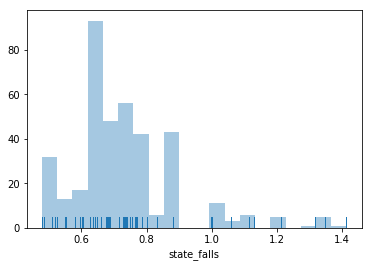

In [133]:
sns.distplot(new_df.state_falls, kde=False, rug=True)   

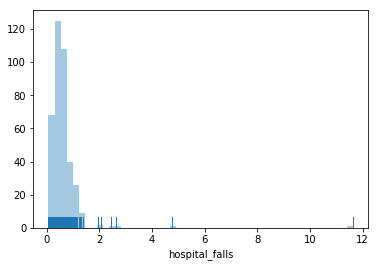

In [134]:
sns.distplot(new_df.hospital_falls, kde=False, rug=True)   

In [136]:
CMS_Data.state_average = CMS_Data.state_average.astype(float)

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [137]:
CMS_Data.dtypes

Hospital ID Number             int64
Measure Name                  object
Rate per 1,000 discharges    float64
Hospital Name                 object
City                          object
State                         object
state_average                float64
dtype: object

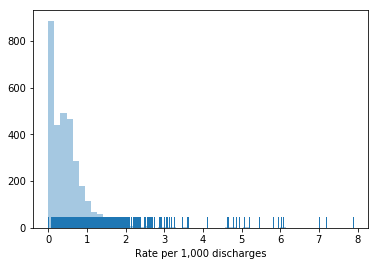

In [138]:
sns.distplot(CMS_Data['Rate per 1,000 discharges'], kde=False, rug=True)

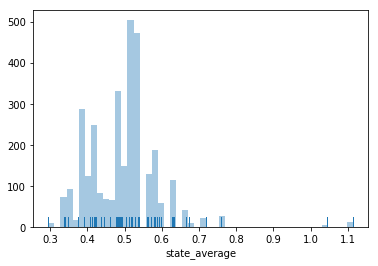

In [139]:
sns.distplot(CMS_Data.state_average, kde=False, rug=True) 

In [142]:
joined_fall.hospital_average = joined_fall.hospital_average.astype(float)
joined_fall.combined_state_average = joined_fall.combined_state_average.astype(float)

In [143]:
joined_fall.dtypes

hospital                      object
state                         object
city                          object
adult_trauma                  object
pediatric_trauma              object
hospital_falls               float64
state_falls                  float64
Hospital ID Number             int64
Measure Name                  object
Rate per 1,000 discharges    float64
Hospital Name                 object
City                          object
State                         object
state_average                float64
hospital_average             float64
combined_state_average       float64
dtype: object

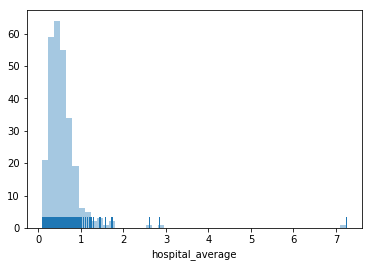

In [144]:
sns.distplot(joined_fall.hospital_average, kde=False, rug=True) 

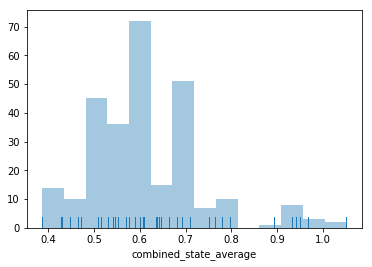

In [145]:
sns.distplot(joined_fall.combined_state_average, kde=False, rug=True)

In [146]:
new_df.describe()

,hospital_falls,state_falls
count,382.000000,382.000000
mean,0.606997,0.731008
std,0.686411,0.165361
min,0.062000,0.479000
25%,0.350500,0.625000
50%,0.522500,0.681000
75%,0.709250,0.801000
max,11.628000,1.414000


In [147]:
CMS_Data.describe()

,Hospital ID Number,"Rate per 1,000 discharges",state_average
count,3140.000000,3140.000000,3140.000000
mean,260836.284713,0.497063,0.497127
std,159271.253119,0.610596,0.093727
min,10001.000000,0.000000,0.295000
25%,110091.750000,0.000000,0.423000
50%,250139.500000,0.397000,0.513000
75%,390117.250000,0.660000,0.540000
max,670078.000000,7.874000,1.113000


In [148]:
joined_fall.describe()

,hospital_falls,state_falls,Hospital ID Number,"Rate per 1,000 discharges",state_average,hospital_average,combined_state_average
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,0.647953,0.731007,253871.310219,0.519241,0.499569,0.583597,0.615288
std,0.791146,0.166741,151752.155213,0.361358,0.111728,0.521794,0.120219
min,0.098000,0.479000,10033.000000,0.000000,0.295000,0.085500,0.387000
25%,0.370000,0.625000,100212.250000,0.301500,0.421000,0.355000,0.520125
50%,0.529500,0.681000,250067.500000,0.453500,0.513000,0.508250,0.607500
75%,0.740500,0.801000,360078.500000,0.648750,0.540000,0.669125,0.681500
max,11.628000,1.414000,670041.000000,2.861000,1.113000,7.244500,1.050500


In [153]:
CMS_city.describe()

,Hospital ID Number,"Rate per 1,000 discharges",state_average,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,BINGE_AdjPrev,OBESITY_CrudePrev,OBESITY_AdjPrev,SLEEP_CrudePrev,SLEEP_AdjPrev,STROKE_CrudePrev,STROKE_AdjPrev
count,1443.000000,1443.000000,1443.000000,1.443000e+03,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000,1443.000000
mean,255254.180180,0.467651,0.490365,4.621313e+05,22.790090,23.943105,16.722176,16.087942,29.893902,30.595288,36.320028,36.433195,3.007415,3.201178
std,164465.273852,0.565714,0.091806,9.132978e+05,4.201453,3.495630,2.642836,2.517887,5.288690,5.483418,4.514080,4.580596,0.718968,0.691722
min,10011.000000,0.000000,0.295000,4.241700e+04,9.400000,16.200000,8.900000,7.100000,14.900000,15.600000,24.400000,24.500000,1.300000,1.700000
25%,100193.500000,0.164000,0.412000,9.800450e+04,19.500000,21.400000,15.100000,14.500000,26.100000,26.700000,33.600000,33.500000,2.500000,2.700000
50%,250027.000000,0.382000,0.494000,1.735140e+05,22.500000,23.900000,16.500000,15.700000,30.600000,31.300000,36.000000,36.000000,2.900000,3.100000
75%,390144.000000,0.593000,0.540000,4.200030e+05,25.500000,26.200000,18.300000,17.600000,33.400000,34.200000,38.850000,39.000000,3.400000,3.600000
max,670078.000000,6.993000,1.113000,8.175133e+06,36.800000,35.800000,25.500000,25.400000,47.100000,47.200000,51.300000,52.000000,6.500000,5.800000


In [154]:
trauma_city.describe()

,hospital_falls,state_falls,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,BINGE_AdjPrev,OBESITY_CrudePrev,OBESITY_AdjPrev,SLEEP_CrudePrev,SLEEP_AdjPrev,STROKE_CrudePrev,STROKE_AdjPrev
count,286.000000,286.000000,2.860000e+02,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.606073,0.727699,5.362244e+05,22.637063,23.916783,16.893007,16.195804,30.239510,30.966084,36.108741,36.198951,2.997552,3.210490
std,0.759940,0.162238,1.154645e+06,4.309283,3.612619,2.607698,2.437971,5.581091,5.672402,4.961893,4.983450,0.736679,0.711382
min,0.062000,0.479000,4.241700e+04,12.800000,17.500000,9.100000,7.100000,14.900000,16.600000,24.400000,24.500000,1.500000,2.000000
25%,0.377500,0.625000,1.057808e+05,19.500000,21.400000,15.300000,14.700000,26.100000,26.550000,33.000000,33.200000,2.500000,2.700000
50%,0.512500,0.681000,1.978990e+05,21.900000,23.600000,16.500000,15.700000,30.200000,31.100000,35.400000,35.500000,2.900000,3.100000
75%,0.691000,0.801000,5.137532e+05,24.600000,26.000000,18.400000,17.700000,33.900000,34.375000,39.075000,39.275000,3.300000,3.500000
max,11.628000,1.414000,8.175133e+06,36.800000,35.800000,25.300000,23.000000,47.100000,47.200000,51.300000,52.000000,6.500000,5.800000


In [155]:
CMS_city.corr()

,Hospital ID Number,"Rate per 1,000 discharges",state_average,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,BINGE_AdjPrev,OBESITY_CrudePrev,OBESITY_AdjPrev,SLEEP_CrudePrev,SLEEP_AdjPrev,STROKE_CrudePrev,STROKE_AdjPrev
Hospital ID Number,1.000000,0.034844,0.256165,-0.010205,0.021374,0.087335,0.043383,0.005727,0.218463,0.227350,-0.025140,-0.026876,0.006200,0.051711
"Rate per 1,000 discharges",0.034844,1.000000,0.126719,-0.060106,0.028009,0.023408,-0.045691,-0.037649,0.044624,0.040923,0.008667,0.008075,0.021601,0.014161
state_average,0.256165,0.126719,1.000000,-0.022000,0.029967,0.032147,0.019461,0.023316,0.059069,0.064868,-0.051547,-0.044623,-0.029680,-0.034279
Population2010,-0.010205,-0.060106,-0.022000,1.000000,-0.130684,-0.130014,0.026630,-0.001917,-0.033226,-0.053696,0.136591,0.114573,0.027584,0.067317
ARTHRITIS_CrudePrev,0.021374,0.028009,0.029967,-0.130684,1.000000,0.810255,-0.383452,-0.153667,0.614005,0.564804,0.476356,0.514376,0.778343,0.504299
ARTHRITIS_AdjPrev,0.087335,0.023408,0.032147,-0.130014,0.810255,1.000000,-0.292071,-0.313248,0.712758,0.754836,0.578664,0.617639,0.697621,0.720036
BINGE_CrudePrev,0.043383,-0.045691,0.019461,0.026630,-0.383452,-0.292071,1.000000,0.907096,-0.389170,-0.346486,-0.473946,-0.472308,-0.503170,-0.410388
BINGE_AdjPrev,0.005727,-0.037649,0.023316,-0.001917,-0.153667,-0.313248,0.907096,1.000000,-0.387420,-0.404322,-0.488611,-0.482255,-0.378640,-0.496392
OBESITY_CrudePrev,0.218463,0.044624,0.059069,-0.033226,0.614005,0.712758,-0.389170,-0.387420,1.000000,0.980373,0.647879,0.649831,0.794191,0.818973
OBESITY_AdjPrev,0.227350,0.040923,0.064868,-0.053696,0.564804,0.754836,-0.346486,-0.404322,0.980373,1.000000,0.636295,0.651711,0.759799,0.846079


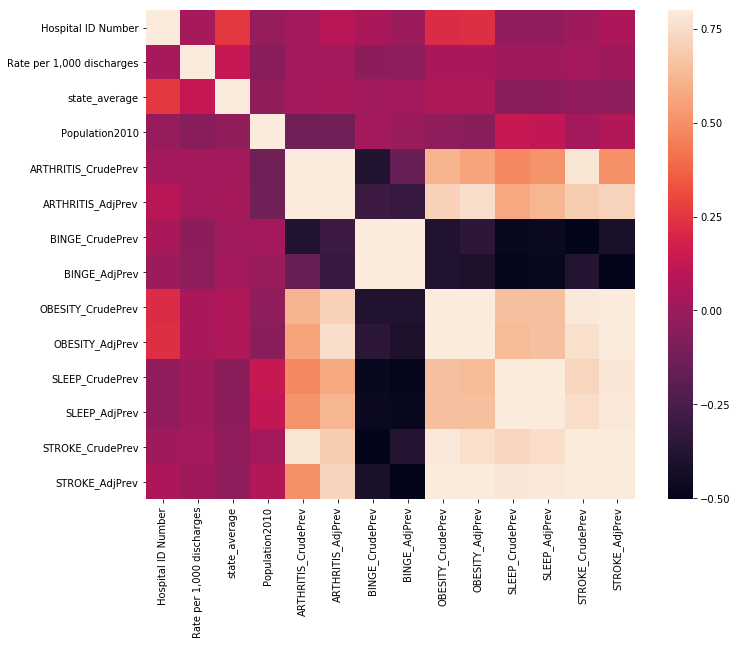

In [158]:
# Make the correlation matrix.
corrmat = CMS_city.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [157]:
trauma_city.corr()

,hospital_falls,state_falls,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,BINGE_AdjPrev,OBESITY_CrudePrev,OBESITY_AdjPrev,SLEEP_CrudePrev,SLEEP_AdjPrev,STROKE_CrudePrev,STROKE_AdjPrev
hospital_falls,1.000000,0.180623,-0.004627,-0.060707,-0.084757,-0.001419,0.009811,0.069361,0.069017,-0.052721,-0.050170,-0.018022,-0.025185
state_falls,0.180623,1.000000,-0.012991,-0.081719,-0.102113,0.009759,0.015035,0.079856,0.069643,-0.308381,-0.316549,-0.131658,-0.143159
Population2010,-0.004627,-0.012991,1.000000,-0.136550,-0.162614,-0.071102,-0.083299,-0.104929,-0.130181,0.146669,0.127951,-0.012506,0.003417
ARTHRITIS_CrudePrev,-0.060707,-0.081719,-0.136550,1.000000,0.848114,-0.444773,-0.243180,0.642817,0.607394,0.515603,0.551366,0.777858,0.547200
ARTHRITIS_AdjPrev,-0.084757,-0.102113,-0.162614,0.848114,1.000000,-0.382258,-0.381602,0.709653,0.745651,0.590246,0.624261,0.711595,0.714559
BINGE_CrudePrev,-0.001419,0.009759,-0.071102,-0.444773,-0.382258,1.000000,0.922808,-0.464669,-0.435252,-0.571533,-0.575314,-0.571137,-0.500438
BINGE_AdjPrev,0.009811,0.015035,-0.083299,-0.243180,-0.381602,0.922808,1.000000,-0.445169,-0.460555,-0.575311,-0.572323,-0.465328,-0.562789
OBESITY_CrudePrev,0.069361,0.079856,-0.104929,0.642817,0.709653,-0.464669,-0.445169,1.000000,0.984409,0.666703,0.668677,0.805208,0.814419
OBESITY_AdjPrev,0.069017,0.069643,-0.130181,0.607394,0.745651,-0.435252,-0.460555,0.984409,1.000000,0.649653,0.661771,0.779095,0.833864
SLEEP_CrudePrev,-0.052721,-0.308381,0.146669,0.515603,0.590246,-0.571533,-0.575311,0.666703,0.649653,1.000000,0.995297,0.757316,0.802971


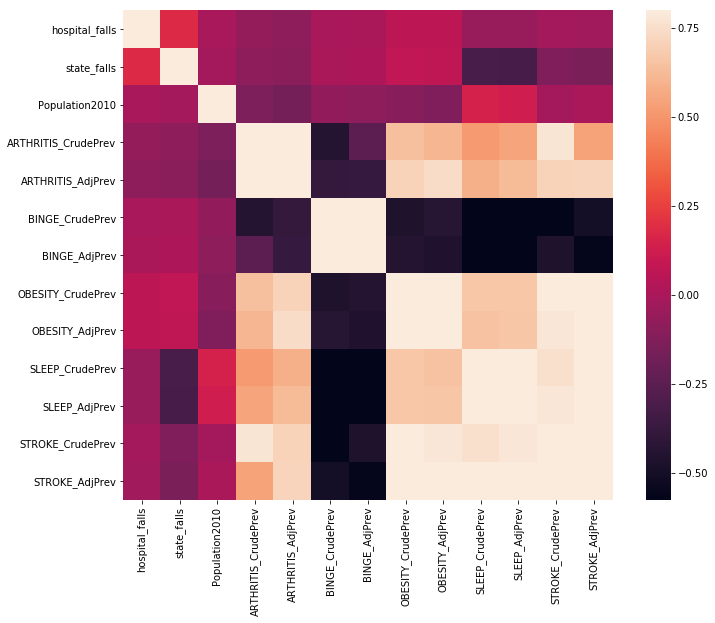

In [159]:
# Make the correlation matrix.
corrmat = trauma_city.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [160]:
total_data = pd.merge(joined_fall, city_data, left_on="City", right_on="PlaceName")

In [161]:
total_data

,hospital,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls,Hospital ID Number,Measure Name,"Rate per 1,000 discharges",...,OBESITY_AdjPrev,OBESITY_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI
0,Alaska Native Medical Center,AK,Anchorage,Level II,None,1.312,1.414,20026,FALLS AND TRAUMA,1.544,...,27.7,"(27.5, 27.9)",34.0,"(33.8, 34.2)",33.4,"(33.2, 33.6)",2.2,"( 2.2, 2.2)",2.6,"( 2.6, 2.6)"
1,University Of Alabama Hospital,AL,Birmingham,Level I,None,0.329,0.715,10033,FALLS AND TRAUMA,0.389,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
2,Chandler Regional Medical Center,AZ,Chandler,Level I,None,0.379,0.801,30036,FALLS AND TRAUMA,0.492,...,24.5,"(24.3, 24.6)",33.7,"(33.5, 33.9)",32.9,"(32.7, 33.1)",2.0,"( 2.0, 2.1)",2.4,"( 2.3, 2.4)"
3,Banner Baywood Medical Center,AZ,Mesa,Level III,None,0.695,0.801,30088,FALLS AND TRAUMA,0.841,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
4,"Mountain Vista Medical Center, Lp",AZ,Mesa,Level III,None,0.710,0.801,30121,FALLS AND TRAUMA,0.556,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
5,Maricopa Medical Center,AZ,Phoenix,Level I,Level II,0.809,0.801,30022,FALLS AND TRAUMA,0.000,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
6,Banner Estrella Medical Center,AZ,Phoenix,Level I,None,0.333,0.801,30115,FALLS AND TRAUMA,0.164,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
7,Tucson Medical Center,AZ,Tucson,Level I,None,1.005,0.801,30006,FALLS AND TRAUMA,0.880,...,30.4,"(30.3, 30.5)",34.4,"(34.2, 34.5)",34.8,"(34.7, 34.9)",3.0,"( 2.9, 3.0)",3.1,"( 3.1, 3.1)"
8,Northbay Medical Center,CA,Fairfield,Level II,None,0.260,0.625,50367,FALLS AND TRAUMA,0.189,...,26.7,"(26.5, 26.9)",35.4,"(35.2, 35.7)",35.3,"(35.1, 35.5)",2.7,"( 2.7, 2.8)",2.9,"( 2.8, 2.9)"
9,Community Regional Medical Center,CA,Fresno,Level I,None,0.180,0.625,50060,FALLS AND TRAUMA,0.193,...,28.7,"(28.6, 28.8)",32.9,"(32.8, 33.0)",32.9,"(32.8, 33.0)",3.1,"( 3.0, 3.1)",3.4,"( 3.4, 3.5)"


In [162]:
total_data.describe()

,hospital_falls,state_falls,Hospital ID Number,"Rate per 1,000 discharges",state_average,hospital_average,combined_state_average,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,BINGE_AdjPrev,OBESITY_CrudePrev,OBESITY_AdjPrev,SLEEP_CrudePrev,SLEEP_AdjPrev,STROKE_CrudePrev,STROKE_AdjPrev
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000
mean,0.648845,0.725415,250603.550000,0.515270,0.490440,0.582057,0.607927,4.890338e+05,22.870000,24.086500,16.842000,16.165500,30.577000,31.320500,36.355000,36.466000,3.04250,3.240000
std,0.889046,0.165731,155361.795467,0.365477,0.103401,0.576742,0.118225,1.067336e+06,4.346303,3.735349,2.539583,2.360853,5.594144,5.725604,4.830418,4.888222,0.75438,0.720762
min,0.117000,0.479000,10033.000000,0.000000,0.295000,0.085500,0.387000,5.140000e+04,14.000000,17.500000,9.500000,9.900000,18.400000,18.400000,24.400000,24.500000,1.60000,2.000000
25%,0.382000,0.625000,90002.500000,0.315000,0.418000,0.360500,0.514500,1.021175e+05,19.500000,21.550000,15.375000,14.800000,26.100000,26.700000,33.675000,33.500000,2.60000,2.700000
50%,0.515000,0.679500,230197.500000,0.445500,0.511000,0.494500,0.589500,1.837425e+05,22.300000,23.600000,16.500000,15.700000,30.600000,31.650000,35.450000,35.600000,2.90000,3.100000
75%,0.696000,0.801250,360084.250000,0.598750,0.540000,0.653375,0.684375,4.622570e+05,25.000000,26.200000,18.400000,17.700000,34.000000,34.550000,39.150000,39.700000,3.40000,3.600000
max,11.628000,1.414000,670041.000000,2.861000,1.113000,7.244500,1.050500,8.175133e+06,36.800000,35.800000,25.300000,23.000000,47.100000,47.200000,51.300000,52.000000,6.50000,5.800000


In [163]:
total_data.corr()

,hospital_falls,state_falls,Hospital ID Number,"Rate per 1,000 discharges",state_average,hospital_average,combined_state_average,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,BINGE_AdjPrev,OBESITY_CrudePrev,OBESITY_AdjPrev,SLEEP_CrudePrev,SLEEP_AdjPrev,STROKE_CrudePrev,STROKE_AdjPrev
hospital_falls,1.000000,0.184374,0.115378,0.625601,0.090705,0.968968,0.168897,0.002031,-0.061654,-0.092747,0.007086,0.022257,0.066241,0.062807,-0.051347,-0.048160,-0.012845,-0.024236
state_falls,0.184374,1.000000,0.425675,0.197973,0.517889,0.204833,0.927391,0.026469,-0.098938,-0.121710,0.032005,0.025088,0.106477,0.087524,-0.259002,-0.270604,-0.102269,-0.107787
Hospital ID Number,0.115378,0.425675,1.000000,0.126352,0.287675,0.128962,0.424164,0.096271,0.015612,0.101039,0.008750,-0.056620,0.328090,0.337608,0.059545,0.053556,0.059369,0.137222
"Rate per 1,000 discharges",0.625601,0.197973,0.126352,1.000000,0.093678,0.799027,0.179728,-0.080410,-0.062777,-0.066115,-0.017516,-0.025255,0.067189,0.072047,-0.021556,-0.018006,0.003685,0.012805
state_average,0.090705,0.517889,0.287675,0.093678,1.000000,0.099592,0.800303,0.053421,0.031838,-0.009117,0.111655,0.138882,0.075388,0.070023,-0.071776,-0.067659,-0.021165,-0.054293
hospital_average,0.968968,0.204833,0.128962,0.799027,0.099592,1.000000,0.187123,-0.023912,-0.067410,-0.092433,-0.000089,0.009152,0.072344,0.071236,-0.046405,-0.042824,-0.008733,-0.014622
combined_state_average,0.168897,0.927391,0.424164,0.179728,0.800303,0.187123,1.000000,0.041914,-0.055424,-0.089295,0.071260,0.078318,0.107599,0.091968,-0.212926,-0.219258,-0.080937,-0.099292
Population2010,0.002031,0.026469,0.096271,-0.080410,0.053421,-0.023912,0.041914,1.000000,-0.150838,-0.166502,-0.051753,-0.069432,-0.090269,-0.113242,0.128598,0.108098,-0.017411,0.007298
ARTHRITIS_CrudePrev,-0.061654,-0.098938,0.015612,-0.062777,0.031838,-0.067410,-0.055424,-0.150838,1.000000,0.860683,-0.474977,-0.296555,0.646411,0.615902,0.542658,0.576811,0.781464,0.580240
ARTHRITIS_AdjPrev,-0.092747,-0.121710,0.101039,-0.066115,-0.009117,-0.092433,-0.089295,-0.166502,0.860683,1.000000,-0.375274,-0.387083,0.712908,0.748155,0.602520,0.634489,0.697619,0.715867


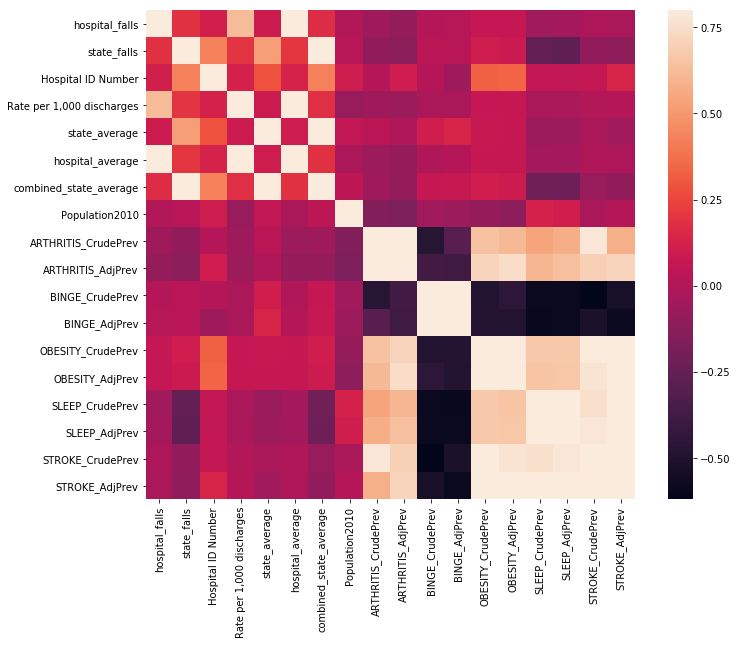

In [164]:
# Make the correlation matrix.
corrmat = total_data.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [171]:
total_categories = total_data

In [177]:
total_categories = total_categories.drop(['hospital', 'Hospital Name', 'city', 'City', 'State', 'Hospital ID Number', 'Measure Name'], axis=1)

In [179]:
total_categories = pd.get_dummies(total_categories)

In [180]:
total_categories.corr()

,hospital_falls,state_falls,"Rate per 1,000 discharges",state_average,hospital_average,combined_state_average,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,...,"STROKE_Adj95CI_( 4.1, 4.3)","STROKE_Adj95CI_( 4.2, 4.3)","STROKE_Adj95CI_( 4.4, 4.5)","STROKE_Adj95CI_( 4.8, 4.9)","STROKE_Adj95CI_( 4.9, 5.2)","STROKE_Adj95CI_( 5.0, 5.1)","STROKE_Adj95CI_( 5.1, 5.2)","STROKE_Adj95CI_( 5.1, 5.3)","STROKE_Adj95CI_( 5.5, 5.8)","STROKE_Adj95CI_( 5.7, 5.8)"
hospital_falls,1.000000,0.184374,0.625601,0.090705,0.968968,0.168897,0.002031,-0.061654,-0.092747,0.007086,...,0.020875,-0.001602,-0.011019,0.026071,0.008801,-0.025567,-0.008029,-0.019815,-0.021170,-0.023782
state_falls,0.184374,1.000000,0.197973,0.517889,0.204833,0.927391,0.026469,-0.098938,-0.121710,0.032005,...,-0.074790,-0.048830,-0.074361,0.006254,-0.039769,-0.004466,0.008867,-0.087493,-0.019045,-0.028826
"Rate per 1,000 discharges",0.625601,0.197973,1.000000,0.093678,0.799027,0.179728,-0.080410,-0.062777,-0.066115,-0.017516,...,-0.021442,0.010064,-0.008997,-0.045359,0.165749,-0.024553,-0.025024,-0.008621,-0.036803,-0.048181
state_average,0.090705,0.517889,0.093678,1.000000,0.099592,0.800303,0.053421,0.031838,-0.009117,0.111655,...,0.067051,0.034170,-0.009237,-0.007175,0.027829,-0.036728,-0.010173,-0.015532,-0.046350,0.045369
hospital_average,0.968968,0.204833,0.799027,0.099592,1.000000,0.187123,-0.023912,-0.067410,-0.092433,-0.000089,...,0.009296,0.001954,-0.011343,0.005723,0.059300,-0.027485,-0.014117,-0.018004,-0.027978,-0.033596
combined_state_average,0.168897,0.927391,0.179728,0.800303,0.187123,1.000000,0.041914,-0.055424,-0.089295,0.071260,...,-0.023099,-0.019283,-0.056160,0.001246,-0.015705,-0.019192,0.001766,-0.068117,-0.033619,-0.000364
Population2010,0.002031,0.026469,-0.080410,0.053421,-0.023912,0.041914,1.000000,-0.150838,-0.166502,-0.051753,...,-0.027844,-0.032277,-0.024253,-0.023138,-0.038855,-0.018430,-0.008705,-0.037679,-0.027215,0.021216
ARTHRITIS_CrudePrev,-0.061654,-0.098938,-0.062777,0.031838,-0.067410,-0.055424,-0.150838,1.000000,0.860683,-0.474977,...,0.046273,0.026472,0.007031,0.150919,0.125878,0.159094,0.218606,0.159492,0.195066,0.264970
ARTHRITIS_AdjPrev,-0.092747,-0.121710,-0.066115,-0.009117,-0.092433,-0.089295,-0.166502,0.860683,1.000000,-0.375274,...,0.040210,0.093182,0.047820,0.163874,0.146022,0.161972,0.208061,0.209410,0.133434,0.264706
BINGE_CrudePrev,0.007086,0.032005,-0.017516,0.111655,-0.000089,0.071260,-0.051753,-0.474977,-0.375274,1.000000,...,-0.048747,-0.060503,-0.093520,-0.082327,-0.219875,-0.149487,-0.069112,-0.104819,-0.205454,-0.132591


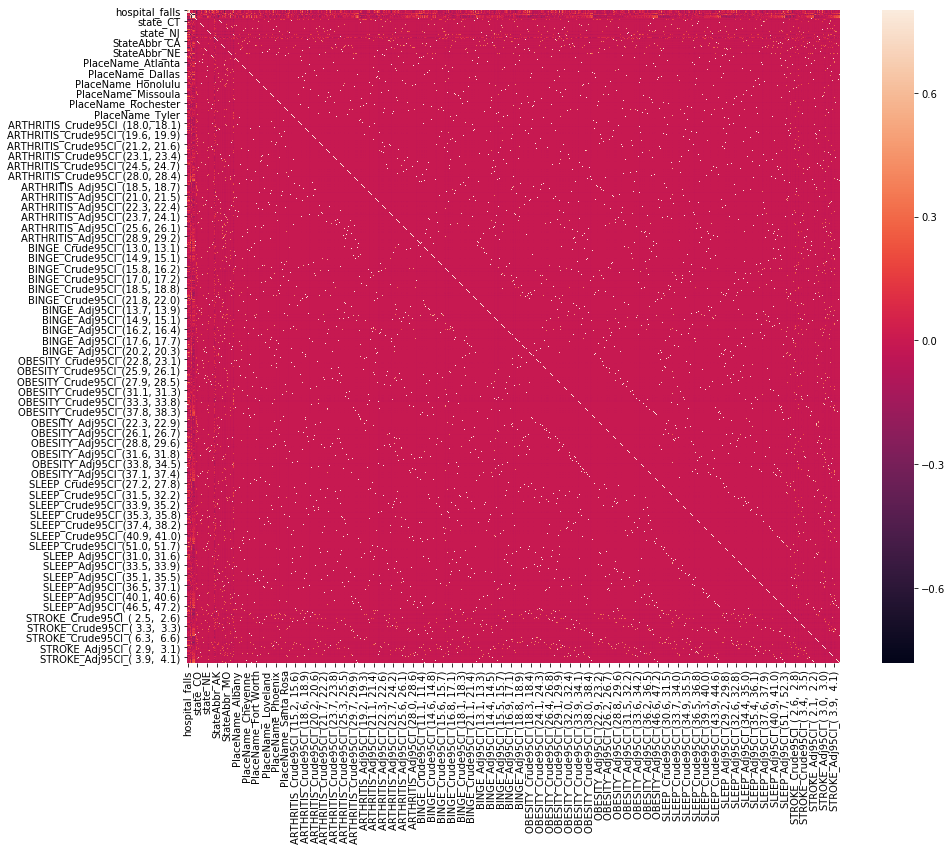

In [182]:
# Make the correlation matrix.
corrmat = total_categories.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(15, 12))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()
# Heatmaps are a great way to get a quick visual read on a big correlation matrix.

# Try to match the correlation numbers to the scatterplots above to get a 
# sense of what each magnitude of correlation can look like.

In [183]:
total_categories

,hospital_falls,state_falls,"Rate per 1,000 discharges",state_average,hospital_average,combined_state_average,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_AdjPrev,BINGE_CrudePrev,...,"STROKE_Adj95CI_( 4.1, 4.3)","STROKE_Adj95CI_( 4.2, 4.3)","STROKE_Adj95CI_( 4.4, 4.5)","STROKE_Adj95CI_( 4.8, 4.9)","STROKE_Adj95CI_( 4.9, 5.2)","STROKE_Adj95CI_( 5.0, 5.1)","STROKE_Adj95CI_( 5.1, 5.2)","STROKE_Adj95CI_( 5.1, 5.3)","STROKE_Adj95CI_( 5.5, 5.8)","STROKE_Adj95CI_( 5.7, 5.8)"
0,1.312,1.414,1.544,0.485,1.4280,0.9495,291826,19.3,21.3,21.6,...,0,0,0,0,0,0,0,0,0,0
1,0.329,0.715,0.389,0.437,0.3590,0.5760,212237,32.6,32.6,11.5,...,0,0,0,0,0,1,0,0,0,0
2,0.379,0.801,0.492,0.562,0.4355,0.6815,236123,19.4,21.2,17.0,...,0,0,0,0,0,0,0,0,0,0
3,0.695,0.801,0.841,0.562,0.7680,0.6815,439041,24.5,23.4,15.3,...,0,0,0,0,0,0,0,0,0,0
4,0.710,0.801,0.556,0.562,0.6330,0.6815,439041,24.5,23.4,15.3,...,0,0,0,0,0,0,0,0,0,0
5,0.809,0.801,0.000,0.562,0.4045,0.6815,1445632,21.6,23.6,15.3,...,0,0,0,0,0,0,0,0,0,0
6,0.333,0.801,0.164,0.562,0.2485,0.6815,1445632,21.6,23.6,15.3,...,0,0,0,0,0,0,0,0,0,0
7,1.005,0.801,0.880,0.562,0.9425,0.6815,520116,22.8,23.8,14.3,...,0,0,0,0,0,0,0,0,0,0
8,0.260,0.625,0.189,0.392,0.2245,0.5085,105321,20.6,21.2,16.8,...,0,0,0,0,0,0,0,0,0,0
9,0.180,0.625,0.193,0.392,0.1865,0.5085,494665,20.2,22.2,15.7,...,0,0,0,0,0,0,0,0,0,0


## Running Models and Looking at Feature Correlation with the CMS and 500 Cities merged dataset

This section of code has the CMS dataset joined with the 500 Cities dataset. I dropped the hospital name and number along with the duplicate columns with city and state data. As you can see below, these beginning model perform very poorly and I am having a hard time understanding which features are most correlated with my dependent variable, "Rate per 1,000 discharges". 

In [261]:
CMS_city

,"Rate per 1,000 discharges",City,State,state_average,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,ARTHRITIS_AdjPrev,ARTHRITIS_Adj95CI,BINGE_CrudePrev,...,OBESITY_AdjPrev,OBESITY_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI
0,1.149,Birmingham,AL,0.437,212237,32.6,"(32.5, 32.8)",32.6,"(32.5, 32.8)",11.5,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
1,0.000,Birmingham,AL,0.437,212237,32.6,"(32.5, 32.8)",32.6,"(32.5, 32.8)",11.5,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
2,0.389,Birmingham,AL,0.437,212237,32.6,"(32.5, 32.8)",32.6,"(32.5, 32.8)",11.5,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
3,0.333,Birmingham,AL,0.437,212237,32.6,"(32.5, 32.8)",32.6,"(32.5, 32.8)",11.5,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
4,0.810,Birmingham,AL,0.437,212237,32.6,"(32.5, 32.8)",32.6,"(32.5, 32.8)",11.5,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
5,0.727,Birmingham,AL,0.437,212237,32.6,"(32.5, 32.8)",32.6,"(32.5, 32.8)",11.5,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
6,0.331,Birmingham,AL,0.437,212237,32.6,"(32.5, 32.8)",32.6,"(32.5, 32.8)",11.5,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
7,2.132,Montgomery,AL,0.437,205764,31.0,"(30.8, 31.2)",31.4,"(31.2, 31.6)",12.5,...,36.8,"(36.6, 37.1)",41.1,"(40.8, 41.4)",41.3,"(41.0, 41.5)",4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)"
8,0.367,Montgomery,AL,0.437,205764,31.0,"(30.8, 31.2)",31.4,"(31.2, 31.6)",12.5,...,36.8,"(36.6, 37.1)",41.1,"(40.8, 41.4)",41.3,"(41.0, 41.5)",4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)"
9,1.019,Montgomery,AL,0.437,205764,31.0,"(30.8, 31.2)",31.4,"(31.2, 31.6)",12.5,...,36.8,"(36.6, 37.1)",41.1,"(40.8, 41.4)",41.3,"(41.0, 41.5)",4.0,"( 3.9, 4.1)",4.1,"( 4.0, 4.1)"


In [186]:
from scipy.stats import pearsonr
size = 200
print("Lower noise", pearsonr(total_categories.hospital_falls, total_categories.hospital_falls + np.random.normal(0, 1, size)))
print("Higher noise", pearsonr(total_categories.hospital_falls, total_categories.hospital_falls + np.random.normal(0, 10, size)))

Lower noise (0.6492150825618302, 2.5541222268139926e-25)
Higher noise (0.11539032716119207, 0.10372082997049098)


In [190]:
CMS_city = CMS_city.drop(['Hospital ID Number', 'Measure Name', 'Hospital Name', 'StateAbbr', 'PlaceName'], axis=1)

In [192]:
y = CMS_city['Rate per 1,000 discharges']

In [230]:
x = CMS_city.loc[:, "City":]

In [232]:
x = pd.get_dummies(x)

In [233]:
from sklearn import feature_selection
feature, p_value = feature_selection.f_regression(x, y)

In [236]:
state_list = x.columns
for i in range(len(feature)):
    if p_value[i] < 0.05:
        print(state_list[i])
        print(feature[i])
        print(p_value[i])

state_average
23.516965765541556
1.372340759763604e-06
Population2010
5.22482500219936
0.022411310960090157
City_Albuquerque
16.43887328165003
5.293060657510367e-05
City_Anaheim
5.345703922000466
0.020913787046964623
City_Broken Arrow
5.952285670662857
0.014818110141038744
City_Camden
3.999372332141967
0.045704632086922624
City_Chandler
49.058495159577454
3.799743881244261e-12
City_Fresno
61.382540754710725
9.0600200590809e-15
City_Frisco
6.098916181282619
0.013641655651179111
City_Lafayette
4.014563913886102
0.0452958103522182
City_Lincoln
12.045299790705224
0.000534558922911112
City_Montgomery
4.680964294470645
0.030662542888547258
City_Ontario
5.172825656749784
0.023089322638909733
City_Redwood City
5.212839521837119
0.02256573382961374
City_Riverside
5.992784536087965
0.014483089700481335
City_Sugar Land
11.955220767171525
0.00056080547522716
City_Tulsa
8.718271838858792
0.0032013791151110633
City_Tyler
4.55487087237743
0.03299362423522746
City_Youngstown
4.121627846637101
0.042521

In [224]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

# Perform feature selection
selector = SelectKBest(f_regression, k=5)
selector.fit(x, y)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
#plt.bar(range(len(x)), scores)
#plt.xticks(range(len(x)), x, rotation='vertical')
#plt.show()

In [217]:
scores

array([5.86253804, 1.64953274, 0.54112671, ..., 1.23952668, 0.09565553,
       0.28003918])

In [221]:
# Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = x.mean(axis=0)
stds = x.std(axis=0)
x['TotalRate'] = ((x - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = x
plotdf['TotalRate'] = x['TotalRate']
corrmat2 = plotdf.corr()

print(corrmat2)

                             state_average  Population2010  \
state_average                     1.000000       -0.022000   
Population2010                   -0.022000        1.000000   
ARTHRITIS_CrudePrev               0.029967       -0.130684   
ARTHRITIS_AdjPrev                 0.032147       -0.130014   
BINGE_CrudePrev                   0.019461        0.026630   
BINGE_AdjPrev                     0.023316       -0.001917   
OBESITY_CrudePrev                 0.059069       -0.033226   
OBESITY_AdjPrev                   0.064868       -0.053696   
SLEEP_CrudePrev                  -0.051547        0.136591   
SLEEP_AdjPrev                    -0.044623        0.114573   
STROKE_CrudePrev                 -0.029680        0.027584   
STROKE_AdjPrev                   -0.034279        0.067317   
City_Abilene                      0.020149       -0.014081   
City_Akron                       -0.005155       -0.013149   
City_Alameda                     -0.028225       -0.011201   
City_Alb

In [238]:
from sklearn import ensemble
# Random Forest Classifier
rfr = ensemble.RandomForestRegressor()
rfr.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [239]:
from sklearn.model_selection import cross_val_score

RFR_score = cross_val_score(rfr, x, y, cv=5)
print('\nEach Cross Validated R2 score: \n', RFR_score)
print("\nOverall Random Forest Regression R2: %0.2f (+/- %0.2f)\n" % (RFR_score.mean(), RFR_score.std() * 2))


Each Cross Validated R2 score: 
 [-0.02183291 -0.02454677 -0.12288549 -0.20822378 -0.0488359 ]

Overall Random Forest Regression R2: -0.09 (+/- 0.14)



In [240]:
# Saving the feature names
feature_list = list(x.columns)
# Get numerical feature importances
importances = list(rfr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [241]:
feature_importances = feature_importances[:20]
importance = []
importance_name = []
for each in feature_importances:
    importance.append(round(each[1], 2))
    importance_name.append(each[0])

In [242]:
feature_importances

[('state_average', 0.06),
 ('ARTHRITIS_CrudePrev', 0.04),
 ('Population2010', 0.03),
 ('BINGE_Crude95CI_(15.6, 15.7)', 0.03),
 ('OBESITY_Adj95CI_(24.3, 24.6)', 0.03),
 ('SLEEP_Crude95CI_(32.8, 33.0)', 0.03),
 ('SLEEP_Adj95CI_(32.8, 33.0)', 0.03),
 ('ARTHRITIS_AdjPrev', 0.02),
 ('BINGE_CrudePrev', 0.02),
 ('State_MS', 0.02),
 ('BINGE_Adj95CI_(16.1, 16.2)', 0.02),
 ('OBESITY_Adj95CI_(20.8, 21.3)', 0.02),
 ('SLEEP_Adj95CI_(36.4, 36.7)', 0.02),
 ('BINGE_AdjPrev', 0.01),
 ('OBESITY_CrudePrev', 0.01),
 ('OBESITY_AdjPrev', 0.01),
 ('SLEEP_CrudePrev', 0.01),
 ('SLEEP_AdjPrev', 0.01),
 ('STROKE_CrudePrev', 0.01),
 ('STROKE_AdjPrev', 0.01)]

In [256]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# Logistic Regression
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [259]:
LR_score = cross_val_score(lr, x, y, cv=5)
print('\nEach Cross Validated R2 score: \n', LR_score)
print("\nOverall Linear Regression R2: %0.2f (+/- %0.2f)\n" % (LR_score.mean(), LR_score.std() * 2))


Each Cross Validated R2 score: 
 [-2.21520051e+11 -2.53776857e+13 -1.20918045e+14 -1.35193641e+13
 -9.44750462e+12]

Overall Linear Regression R2: -33896823876054.34 (+/- 88509004270755.33)



In [254]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [260]:
SVR_score = cross_val_score(svr, x, y, cv=5)
print('\nEach Cross Validated R2 score: \n', SVR_score)
print("\nOverall Support Vector Regression R2: %0.2f (+/- %0.2f)\n" % (SVR_score.mean(), SVR_score.std() * 2))


Each Cross Validated R2 score: 
 [-0.00313438 -0.00515921 -0.05906113 -0.05491442 -0.01558384]

Overall Support Vector Regression R2: -0.03 (+/- 0.05)



## Running Models and Looking at Feature Correlation with the Trauma and 500 Cities merged dataset

Here I am working with the trauma dataset joined with the 500 Cities dataset. I dropped the hospital name and the duplicate columns with city and state data. These models again perform very poorly. 

In [262]:
trauma_city

,hospital,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls,StateAbbr,PlaceName,Population2010,...,OBESITY_AdjPrev,OBESITY_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI
0,Alaska Native Medical Center,AK,Anchorage,Level II,None,1.312,1.414,AK,Anchorage,291826,...,27.7,"(27.5, 27.9)",34.0,"(33.8, 34.2)",33.4,"(33.2, 33.6)",2.2,"( 2.2, 2.2)",2.6,"( 2.6, 2.6)"
1,University Of Alabama Hospital,AL,Birmingham,Level I,None,0.329,0.715,AL,Birmingham,212237,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
2,Arkansas Heart Hospital,AR,Little Rock,None,Level I,0.101,0.772,AR,Little Rock,193524,...,31.0,"(30.8, 31.1)",36.6,"(36.4, 36.9)",36.5,"(36.3, 36.8)",3.3,"( 3.3, 3.4)",3.4,"( 3.3, 3.4)"
3,Chandler Regional Medical Center,AZ,Chandler,Level I,None,0.379,0.801,AZ,Chandler,236123,...,24.5,"(24.3, 24.6)",33.7,"(33.5, 33.9)",32.9,"(32.7, 33.1)",2.0,"( 2.0, 2.1)",2.4,"( 2.3, 2.4)"
4,Banner Baywood Medical Center,AZ,Mesa,Level III,None,0.695,0.801,AZ,Mesa,439041,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
5,"Mountain Vista Medical Center, Lp",AZ,Mesa,Level III,None,0.710,0.801,AZ,Mesa,439041,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
6,Phoenix Baptist Hospital,AZ,Phoenix,Level I,None,0.928,0.801,AZ,Phoenix,1445632,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
7,Paradise Valley Hospital,AZ,Phoenix,Level III,None,1.272,0.801,AZ,Phoenix,1445632,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
8,Maricopa Medical Center,AZ,Phoenix,Level I,Level II,0.809,0.801,AZ,Phoenix,1445632,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
9,John C Lincoln North Mountain Hospital,AZ,Phoenix,Level I,None,0.445,0.801,AZ,Phoenix,1445632,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"


In [264]:
trauma_city = trauma_city.drop(['hospital', 'StateAbbr','PlaceName'], axis=1)

In [265]:
trauma_city

,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls,Population2010,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,ARTHRITIS_AdjPrev,...,OBESITY_AdjPrev,OBESITY_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI
0,AK,Anchorage,Level II,None,1.312,1.414,291826,19.3,"(19.2, 19.4)",21.3,...,27.7,"(27.5, 27.9)",34.0,"(33.8, 34.2)",33.4,"(33.2, 33.6)",2.2,"( 2.2, 2.2)",2.6,"( 2.6, 2.6)"
1,AL,Birmingham,Level I,None,0.329,0.715,212237,32.6,"(32.5, 32.8)",32.6,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
2,AR,Little Rock,None,Level I,0.101,0.772,193524,25.2,"(25.0, 25.3)",25.2,...,31.0,"(30.8, 31.1)",36.6,"(36.4, 36.9)",36.5,"(36.3, 36.8)",3.3,"( 3.3, 3.4)",3.4,"( 3.3, 3.4)"
3,AZ,Chandler,Level I,None,0.379,0.801,236123,19.4,"(19.3, 19.5)",21.2,...,24.5,"(24.3, 24.6)",33.7,"(33.5, 33.9)",32.9,"(32.7, 33.1)",2.0,"( 2.0, 2.1)",2.4,"( 2.3, 2.4)"
4,AZ,Mesa,Level III,None,0.695,0.801,439041,24.5,"(24.4, 24.7)",23.4,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
5,AZ,Mesa,Level III,None,0.710,0.801,439041,24.5,"(24.4, 24.7)",23.4,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
6,AZ,Phoenix,Level I,None,0.928,0.801,1445632,21.6,"(21.5, 21.6)",23.6,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
7,AZ,Phoenix,Level III,None,1.272,0.801,1445632,21.6,"(21.5, 21.6)",23.6,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
8,AZ,Phoenix,Level I,Level II,0.809,0.801,1445632,21.6,"(21.5, 21.6)",23.6,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
9,AZ,Phoenix,Level I,None,0.445,0.801,1445632,21.6,"(21.5, 21.6)",23.6,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"


In [267]:
y = trauma_city.hospital_falls
x = trauma_city.drop('hospital_falls', axis=1)

In [268]:
x = pd.get_dummies(x)

In [269]:
from sklearn import feature_selection
feature, p_value = feature_selection.f_regression(x, y)

In [270]:
trauma_list = x.columns
for i in range(len(feature)):
    if p_value[i] < 0.05:
        print(state_list[i])
        print(feature[i])
        print(p_value[i])

state_average
9.577832197798115
0.002165899283810014
City_Baldwin Park
8.290954697471003
0.00428740320056153
City_Boca Raton
13.591194814438651
0.00027218203809011574
City_Daly City
191.2312152493545
1.3214322834616955e-33
City_Henderson
8.290954697471003
0.00428740320056153
City_Oceanside
191.2312152493545
1.3214322834616955e-33
City_Renton
8.290954697471003
0.00428740320056153
City_Westminster
191.2312152493545
1.3214322834616955e-33
State_WA
8.290954697471003
0.00428740320056153
ARTHRITIS_Crude95CI_(21.0, 21.2)
191.2312152493545
1.3214322834616955e-33
ARTHRITIS_Crude95CI_(26.8, 27.3)
191.2312152493545
1.3214322834616955e-33
ARTHRITIS_Crude95CI_(36.5, 37.1)
8.290954697471003
0.00428740320056153
ARTHRITIS_Adj95CI_(20.9, 21.5)
8.290954697471003
0.00428740320056153
ARTHRITIS_Adj95CI_(22.3, 22.8)
191.2312152493545
1.3214322834616955e-33
ARTHRITIS_Adj95CI_(26.3, 26.8)
6.130841013691789
0.013867343830975449
ARTHRITIS_Adj95CI_(30.7, 31.1)
191.2312152493545
1.3214322834616955e-33
BINGE_Crude

In [271]:
means = x.mean(axis=0)
stds = x.std(axis=0)
x['TotalRate'] = ((x - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = x
plotdf['TotalRate'] = x['TotalRate']
corrmat2 = plotdf.corr()

print(corrmat2)

                             state_falls  Population2010  ARTHRITIS_CrudePrev  \
state_falls                     1.000000       -0.012991            -0.081719   
Population2010                 -0.012991        1.000000            -0.136550   
ARTHRITIS_CrudePrev            -0.081719       -0.136550             1.000000   
ARTHRITIS_AdjPrev              -0.102113       -0.162614             0.848114   
BINGE_CrudePrev                 0.009759       -0.071102            -0.444773   
BINGE_AdjPrev                   0.015035       -0.083299            -0.243180   
OBESITY_CrudePrev               0.079856       -0.104929             0.642817   
OBESITY_AdjPrev                 0.069643       -0.130181             0.607394   
SLEEP_CrudePrev                -0.308381        0.146669             0.515603   
SLEEP_AdjPrev                  -0.316549        0.127951             0.551366   
STROKE_CrudePrev               -0.131658       -0.012506             0.777858   
STROKE_AdjPrev              

In [272]:
from sklearn import ensemble
# Random Forest Classifier
rfr = ensemble.RandomForestRegressor()
rfr.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [273]:
from sklearn.model_selection import cross_val_score

RFR_score = cross_val_score(rfr, x, y, cv=5)
print('\nEach Cross Validated R2 score: \n', RFR_score)
print("\nOverall Random Forest Regression R2: %0.2f (+/- %0.2f)\n" % (RFR_score.mean(), RFR_score.std() * 2))


Each Cross Validated R2 score: 
 [-0.07046856 -0.21183237 -0.20004551 -0.03676228 -0.08018806]

Overall Random Forest Regression R2: -0.12 (+/- 0.14)



In [274]:
# Saving the feature names
feature_list = list(x.columns)
# Get numerical feature importances
importances = list(rfr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [275]:
feature_importances = feature_importances[:20]
importance = []
importance_name = []
for each in feature_importances:
    importance.append(round(each[1], 2))
    importance_name.append(each[0])

In [276]:
feature_importances

[('BINGE_Adj95CI_(16.2, 16.3)', 0.16),
 ('OBESITY_Crude95CI_(34.9, 35.2)', 0.09),
 ('SLEEP_Crude95CI_(33.7, 34.0)', 0.09),
 ('STROKE_Adj95CI_( 3.0,  3.0)', 0.09),
 ('OBESITY_Adj95CI_(35.3, 35.6)', 0.08),
 ('TotalRate', 0.07),
 ('ARTHRITIS_Adj95CI_(23.5, 23.7)', 0.04),
 ('state_falls', 0.03),
 ('BINGE_Adj95CI_(20.8, 20.9)', 0.03),
 ('Population2010', 0.02),
 ('city_Omaha', 0.02),
 ('STROKE_Adj95CI_( 2.9,  2.9)', 0.02),
 ('ARTHRITIS_CrudePrev', 0.01),
 ('ARTHRITIS_AdjPrev', 0.01),
 ('BINGE_CrudePrev', 0.01),
 ('BINGE_AdjPrev', 0.01),
 ('OBESITY_CrudePrev', 0.01),
 ('STROKE_CrudePrev', 0.01),
 ('state_NE', 0.01),
 ('state_NY', 0.01)]

In [277]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# Logistic Regression
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [278]:
LR_score = cross_val_score(lr, x, y, cv=5)
print('\nEach Cross Validated R2 score: \n', LR_score)
print("\nOverall Linear Regression R2: %0.2f (+/- %0.2f)\n" % (LR_score.mean(), LR_score.std() * 2))


Each Cross Validated R2 score: 
 [-5.98080454e+08 -6.13315564e+08 -1.38299675e+11 -8.80477779e+06
 -8.60300356e+07]

Overall Linear Regression R2: -27921181115.43 (+/- 110379634336.44)



In [279]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [280]:
SVR_score = cross_val_score(svr, x, y, cv=5)
print('\nEach Cross Validated R2 score: \n', SVR_score)
print("\nOverall Support Vector Regression R2: %0.2f (+/- %0.2f)\n" % (SVR_score.mean(), SVR_score.std() * 2))


Each Cross Validated R2 score: 
 [-0.00752087 -0.0549332  -0.08416383 -0.00351313 -0.04654502]

Overall Support Vector Regression R2: -0.04 (+/- 0.06)



## Running Models and Looking at Feature Correlation with the joined Trauma and CMS data

Here I am using my last joined dataset that contains data from the trauma, CMS, and 500 cities datasets. I set my dependent feature to the hospital_average which I calculated earlier through meta-analysis. Since this hospital_average column contained the data from the 'hospital_falls' and 'Rate per 1,000 discharges' columns, I dropped both of these features. Again, all my models performed very poorly. 

In [281]:
total_data

,hospital,state,city,adult_trauma,pediatric_trauma,hospital_falls,state_falls,Hospital ID Number,Measure Name,"Rate per 1,000 discharges",...,OBESITY_AdjPrev,OBESITY_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI
0,Alaska Native Medical Center,AK,Anchorage,Level II,None,1.312,1.414,20026,FALLS AND TRAUMA,1.544,...,27.7,"(27.5, 27.9)",34.0,"(33.8, 34.2)",33.4,"(33.2, 33.6)",2.2,"( 2.2, 2.2)",2.6,"( 2.6, 2.6)"
1,University Of Alabama Hospital,AL,Birmingham,Level I,None,0.329,0.715,10033,FALLS AND TRAUMA,0.389,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
2,Chandler Regional Medical Center,AZ,Chandler,Level I,None,0.379,0.801,30036,FALLS AND TRAUMA,0.492,...,24.5,"(24.3, 24.6)",33.7,"(33.5, 33.9)",32.9,"(32.7, 33.1)",2.0,"( 2.0, 2.1)",2.4,"( 2.3, 2.4)"
3,Banner Baywood Medical Center,AZ,Mesa,Level III,None,0.695,0.801,30088,FALLS AND TRAUMA,0.841,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
4,"Mountain Vista Medical Center, Lp",AZ,Mesa,Level III,None,0.710,0.801,30121,FALLS AND TRAUMA,0.556,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
5,Maricopa Medical Center,AZ,Phoenix,Level I,Level II,0.809,0.801,30022,FALLS AND TRAUMA,0.000,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
6,Banner Estrella Medical Center,AZ,Phoenix,Level I,None,0.333,0.801,30115,FALLS AND TRAUMA,0.164,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
7,Tucson Medical Center,AZ,Tucson,Level I,None,1.005,0.801,30006,FALLS AND TRAUMA,0.880,...,30.4,"(30.3, 30.5)",34.4,"(34.2, 34.5)",34.8,"(34.7, 34.9)",3.0,"( 2.9, 3.0)",3.1,"( 3.1, 3.1)"
8,Northbay Medical Center,CA,Fairfield,Level II,None,0.260,0.625,50367,FALLS AND TRAUMA,0.189,...,26.7,"(26.5, 26.9)",35.4,"(35.2, 35.7)",35.3,"(35.1, 35.5)",2.7,"( 2.7, 2.8)",2.9,"( 2.8, 2.9)"
9,Community Regional Medical Center,CA,Fresno,Level I,None,0.180,0.625,50060,FALLS AND TRAUMA,0.193,...,28.7,"(28.6, 28.8)",32.9,"(32.8, 33.0)",32.9,"(32.8, 33.0)",3.1,"( 3.0, 3.1)",3.4,"( 3.4, 3.5)"


In [284]:
total_data = total_data.drop(['hospital_falls', 'Rate per 1,000 discharges', 'City', 'State', 'Hospital ID Number', 'Measure Name', 'Hospital Name', 'hospital', 'StateAbbr', 'PlaceName'], axis=1)

In [285]:
total_data

,state,city,adult_trauma,pediatric_trauma,state_falls,state_average,hospital_average,combined_state_average,Population2010,ARTHRITIS_CrudePrev,...,OBESITY_AdjPrev,OBESITY_Adj95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,SLEEP_AdjPrev,SLEEP_Adj95CI,STROKE_CrudePrev,STROKE_Crude95CI,STROKE_AdjPrev,STROKE_Adj95CI
0,AK,Anchorage,Level II,None,1.414,0.485,1.4280,0.9495,291826,19.3,...,27.7,"(27.5, 27.9)",34.0,"(33.8, 34.2)",33.4,"(33.2, 33.6)",2.2,"( 2.2, 2.2)",2.6,"( 2.6, 2.6)"
1,AL,Birmingham,Level I,None,0.715,0.437,0.3590,0.5760,212237,32.6,...,39.0,"(38.8, 39.1)",46.5,"(46.3, 46.7)",46.9,"(46.6, 47.0)",5.0,"( 5.0, 5.1)",5.0,"( 5.0, 5.1)"
2,AZ,Chandler,Level I,None,0.801,0.562,0.4355,0.6815,236123,19.4,...,24.5,"(24.3, 24.6)",33.7,"(33.5, 33.9)",32.9,"(32.7, 33.1)",2.0,"( 2.0, 2.1)",2.4,"( 2.3, 2.4)"
3,AZ,Mesa,Level III,None,0.801,0.562,0.7680,0.6815,439041,24.5,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
4,AZ,Mesa,Level III,None,0.801,0.562,0.6330,0.6815,439041,24.5,...,28.3,"(28.2, 28.4)",34.2,"(34.1, 34.3)",34.7,"(34.5, 34.8)",3.0,"( 3.0, 3.1)",2.9,"( 2.8, 2.9)"
5,AZ,Phoenix,Level I,Level II,0.801,0.562,0.4045,0.6815,1445632,21.6,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
6,AZ,Phoenix,Level I,None,0.801,0.562,0.2485,0.6815,1445632,21.6,...,30.1,"(30.0, 30.2)",36.2,"(36.1, 36.3)",35.6,"(35.6, 35.7)",2.7,"( 2.7, 2.8)",3.1,"( 3.1, 3.1)"
7,AZ,Tucson,Level I,None,0.801,0.562,0.9425,0.6815,520116,22.8,...,30.4,"(30.3, 30.5)",34.4,"(34.2, 34.5)",34.8,"(34.7, 34.9)",3.0,"( 2.9, 3.0)",3.1,"( 3.1, 3.1)"
8,CA,Fairfield,Level II,None,0.625,0.392,0.2245,0.5085,105321,20.6,...,26.7,"(26.5, 26.9)",35.4,"(35.2, 35.7)",35.3,"(35.1, 35.5)",2.7,"( 2.7, 2.8)",2.9,"( 2.8, 2.9)"
9,CA,Fresno,Level I,None,0.625,0.392,0.1865,0.5085,494665,20.2,...,28.7,"(28.6, 28.8)",32.9,"(32.8, 33.0)",32.9,"(32.8, 33.0)",3.1,"( 3.0, 3.1)",3.4,"( 3.4, 3.5)"


In [286]:
y = total_data.hospital_average
x = total_data.drop('hospital_average', axis=1)

In [287]:
x = pd.get_dummies(x)

In [288]:
from sklearn import feature_selection
feature, p_value = feature_selection.f_regression(x, y)

In [289]:
trauma_list = x.columns
for i in range(len(feature)):
    if p_value[i] < 0.05:
        print(state_list[i])
        print(feature[i])
        print(p_value[i])

state_average
8.671230779986288
0.0036196631395212352
ARTHRITIS_CrudePrev
7.184540208976794
0.007973054937792155
City_Baton Rouge
9.268295421524412
0.002648364744559457
City_Boca Raton
10.511000649226503
0.0013924361619026009
City_Concord
409.2689771547159
4.4960001174664115e-50
City_Fremont
9.268295421524412
0.002648364744559457
City_Melbourne
409.2689771547159
4.4960001174664115e-50
City_North Las Vegas
9.268295421524412
0.002648364744559457
City_Santa Rosa
409.2689771547159
4.4960001174664115e-50
City_Warren
9.268295421524412
0.002648364744559457
ARTHRITIS_Crude95CI_(18.0, 18.2)
409.2689771547159
4.4960001174664115e-50
ARTHRITIS_Crude95CI_(22.3, 22.9)
409.2689771547159
4.4960001174664115e-50
ARTHRITIS_Crude95CI_(24.1, 24.7)
9.268295421524412
0.002648364744559457
ARTHRITIS_Crude95CI_(27.9, 28.4)
9.268295421524412
0.002648364744559457
ARTHRITIS_Crude95CI_(35.3, 35.7)
409.2689771547159
4.4960001174664115e-50
ARTHRITIS_Adj95CI_(20.9, 21.1)
5.557093106097351
0.019381648285219842
ARTHRITI

In [290]:
means = x.mean(axis=0)
stds = x.std(axis=0)
x['TotalRate'] = ((x - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = x
plotdf['TotalRate'] = x['TotalRate']
corrmat2 = plotdf.corr()

print(corrmat2)

                             state_falls  state_average  \
state_falls                     1.000000       0.517889   
state_average                   0.517889       1.000000   
combined_state_average          0.927391       0.800303   
Population2010                  0.026469       0.053421   
ARTHRITIS_CrudePrev            -0.098938       0.031838   
ARTHRITIS_AdjPrev              -0.121710      -0.009117   
BINGE_CrudePrev                 0.032005       0.111655   
BINGE_AdjPrev                   0.025088       0.138882   
OBESITY_CrudePrev               0.106477       0.075388   
OBESITY_AdjPrev                 0.087524       0.070023   
SLEEP_CrudePrev                -0.259002      -0.071776   
SLEEP_AdjPrev                  -0.270604      -0.067659   
STROKE_CrudePrev               -0.102269      -0.021165   
STROKE_AdjPrev                 -0.107787      -0.054293   
state_AK                        0.295268      -0.003739   
state_AL                       -0.004466      -0.036728 

In [291]:
from sklearn import ensemble
# Random Forest Classifier
rfr = ensemble.RandomForestRegressor()
rfr.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [292]:
from sklearn.model_selection import cross_val_score

RFR_score = cross_val_score(rfr, x, y, cv=5)
print('\nEach Cross Validated R2 score: \n', RFR_score)
print("\nOverall Random Forest Regression R2: %0.2f (+/- %0.2f)\n" % (RFR_score.mean(), RFR_score.std() * 2))


Each Cross Validated R2 score: 
 [ 0.00146388 -0.0905662   0.09044996 -0.14890494 -0.09421735]

Overall Random Forest Regression R2: -0.05 (+/- 0.17)



In [293]:
# Saving the feature names
feature_list = list(x.columns)
# Get numerical feature importances
importances = list(rfr.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [294]:
feature_importances = feature_importances[:20]
importance = []
importance_name = []
for each in feature_importances:
    importance.append(round(each[1], 2))
    importance_name.append(each[0])

In [295]:
feature_importances

[('ARTHRITIS_Crude95CI_(19.7, 19.9)', 0.16),
 ('OBESITY_Adj95CI_(35.3, 35.6)', 0.16),
 ('city_El Paso', 0.08),
 ('OBESITY_Crude95CI_(34.9, 35.2)', 0.08),
 ('SLEEP_Crude95CI_(33.7, 34.0)', 0.08),
 ('SLEEP_Adj95CI_(33.8, 34.1)', 0.07),
 ('STROKE_Adj95CI_( 3.0,  3.0)', 0.07),
 ('ARTHRITIS_Adj95CI_(22.3, 22.8)', 0.04),
 ('state_NE', 0.02),
 ('city_Albany', 0.02),
 ('BINGE_Adj95CI_(20.8, 20.9)', 0.02),
 ('Population2010', 0.01),
 ('BINGE_CrudePrev', 0.01),
 ('SLEEP_AdjPrev', 0.01),
 ('city_Anchorage', 0.01),
 ('city_Aurora', 0.01),
 ('ARTHRITIS_Crude95CI_(19.4, 19.5)', 0.01),
 ('ARTHRITIS_Adj95CI_(21.8, 22.0)', 0.01),
 ('SLEEP_Adj95CI_(35.4, 35.9)', 0.01),
 ('STROKE_Crude95CI_( 3.4,  3.6)', 0.01)]

In [302]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

# Logistic Regression
lr = LinearRegression()
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [303]:
LR_score = cross_val_score(lr, x, y, cv=5)
print('\nEach Cross Validated R2 score: \n', LR_score)
print("\nOverall Linear Regression R2: %0.2f (+/- %0.2f)\n" % (LR_score.mean(), LR_score.std() * 2))


Each Cross Validated R2 score: 
 [-3.35937020e+09 -1.93515373e+00 -1.44129033e+11 -3.78662797e+09
 -2.78247938e+11]

Overall Linear Regression R2: -85904593757.05 (+/- 221490804680.00)



In [298]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [299]:
SVR_score = cross_val_score(svr, x, y, cv=5)
print('\nEach Cross Validated R2 score: \n', SVR_score)
print("\nOverall Support Vector Regression R2: %0.2f (+/- %0.2f)\n" % (SVR_score.mean(), SVR_score.std() * 2))


Each Cross Validated R2 score: 
 [-0.00141368 -0.10253143  0.01056333  0.01914645 -0.05500852]

Overall Support Vector Regression R2: -0.03 (+/- 0.09)



correlation between features and the outcome. normally distributed errors. feature selection is important. Getting demifeatures 0 and 1s. 